# Compare BetaVAE models

In [41]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [42]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [43]:
pd.set_option("display.max_colwidth", 200)
# df1 = load_experiment_sessions('MoNA', 'betavae_capacity_nextron', 
#     ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
#      'experiment05.csv', 'experiment06.csv'])
df1 = load_experiment_sessions('MoNA', 'betavae_nextron', 
    ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
     'experiment05.csv', 'experiment06.csv', 'experiment07.csv', 'experiment08.csv', 'experiment09.csv'])
df2 = load_experiment_sessions('HMDB', 'betavae_nextron', 
    ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
     'experiment05.csv', 'experiment06.csv', 'experiment07.csv', 'experiment08.csv', 'experiment09.csv'])
# df2 = load_experiment_sessions('HMDB', 'betavae_capacity_nextron', 
#     ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
#      'experiment05.csv', 'experiment06.csv'])
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv(utils.get_project_path() / '.model' / 'betavae_preprocessing.csv')
df

,name,dataset,full_model_name,layer_config,input_columns,param_latent_dim,param_beta,param_limit,param_dropout,param_max_mz,...,m_test_kldiv,m_test_recon,m_test_cos_sim,m_test_eu_dist,m_test_per_chag,m_test_per_diff,m_test_avg_cos_sim,m_test_avg_eu_dist,m_test_avg_per_chag,m_test_avg_per_diff
0,beta_vae,MoNA,beta_vae_20-15-3-15-20_01 (01-12-2021_13-57-54),"[[20, 15, 3], [3, 15, 20]]",['spectrum'],3,0.01,1.0,0.0,2500.0,...,0.057068,3.755943,0.995005,0.111547,9552.881836,0.681432,0.938942,0.327795,103456.796875,0.876166
1,beta_vae,MoNA,beta_vae_20-15-4-15-20_01 (01-12-2021_14-02-21),"[[20, 15, 4], [4, 15, 20]]",['spectrum'],4,0.01,1.0,0.0,2500.0,...,0.062511,3.738173,0.996386,0.094363,8385.061523,0.665281,0.938942,0.327795,103456.796875,0.876166
2,beta_vae,MoNA,beta_vae_20-15-5-15-20_01 (01-12-2021_14-06-47),"[[20, 15, 5], [5, 15, 20]]",['spectrum'],5,0.01,1.0,0.0,2500.0,...,0.067501,3.720875,0.996848,0.088679,7033.623535,0.641784,0.938942,0.327795,103456.796875,0.876166
3,beta_vae,MoNA,beta_vae_20-15-10-15-20_01 (01-12-2021_14-11-08),"[[20, 15, 10], [10, 15, 20]]",['spectrum'],10,0.01,1.0,0.0,2500.0,...,0.072100,3.722349,0.997006,0.085317,5898.563965,0.643060,0.938942,0.327795,103456.796875,0.876166
4,beta_vae,MoNA,beta_vae_20-3-20_01 (01-12-2021_14-15-24),"[[20, 3], [3, 20]]",['spectrum'],3,0.01,1.0,0.0,2500.0,...,0.065606,3.890304,0.990743,0.155239,48439.097656,0.760787,0.938942,0.327795,103456.796875,0.876166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,beta_vae,HMDB,beta_vae_100-15-10-5-3-5-10-15-100_09 (09-12-2021_08-59-27),"[[100, 15, 10, 5, 3], [3, 5, 10, 15, 100]]",['spectrum'],3,100.00,1.0,0.0,2500.0,...,0.000018,13.834228,0.755019,0.647019,99470.273438,1.353779,0.753579,0.684648,147255.812500,0.620081
10678,beta_vae,HMDB,beta_vae_100-15-3-100_09 (09-12-2021_09-04-03),"[[100, 15, 3], [3, 100]]",['spectrum'],3,100.00,1.0,0.0,2500.0,...,0.000003,13.825396,0.753695,0.645877,103705.750000,1.399868,0.753579,0.684648,147255.812500,0.620081
10679,beta_vae,HMDB,beta_vae_100-3-15-100_09 (09-12-2021_09-07-39),"[[100, 3], [3, 15, 100]]",['spectrum'],3,100.00,1.0,0.0,2500.0,...,0.016545,13.781503,0.753633,0.646577,101457.515625,1.347279,0.753579,0.684648,147255.812500,0.620081
10680,beta_vae,HMDB,beta_vae_100-10-3-10-15-100_09 (09-12-2021_09-11-11),"[[100, 10, 3], [3, 10, 15, 100]]",['spectrum'],3,100.00,1.0,0.0,2500.0,...,0.000073,13.864107,0.757552,0.643505,93543.429688,1.351928,0.753579,0.684648,147255.812500,0.620081


In [44]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

In [45]:
import ast
def is_symmetric(row):
    layer_config = ast.literal_eval(row['layer_config'])
    return len(layer_config[0]) == len(layer_config[1])

def depth(row):
    layer_config = ast.literal_eval(row['layer_config'])
    lencoder, ldecoder = len(layer_config[0]) - 2, len(layer_config[1]) - 2
    return max(lencoder, ldecoder)

df['is_symmetric'] = df.apply(is_symmetric, axis=1)
df['depth'] = df.apply(depth, axis=1)
df


,name,dataset,full_model_name,layer_config,input_columns,param_latent_dim,param_beta,param_limit,param_dropout,param_max_mz,...,m_test_cos_sim,m_test_eu_dist,m_test_per_chag,m_test_per_diff,m_test_avg_cos_sim,m_test_avg_eu_dist,m_test_avg_per_chag,m_test_avg_per_diff,is_symmetric,depth
0,beta_vae,MoNA,beta_vae_20-15-3-15-20_01 (01-12-2021_13-57-54),"[[20, 15, 3], [3, 15, 20]]",['spectrum'],3,0.01,1.0,0.0,2500.0,...,0.995005,0.111547,9552.881836,0.681432,0.938942,0.327795,103456.796875,0.876166,True,1
1,beta_vae,MoNA,beta_vae_20-15-4-15-20_01 (01-12-2021_14-02-21),"[[20, 15, 4], [4, 15, 20]]",['spectrum'],4,0.01,1.0,0.0,2500.0,...,0.996386,0.094363,8385.061523,0.665281,0.938942,0.327795,103456.796875,0.876166,True,1
2,beta_vae,MoNA,beta_vae_20-15-5-15-20_01 (01-12-2021_14-06-47),"[[20, 15, 5], [5, 15, 20]]",['spectrum'],5,0.01,1.0,0.0,2500.0,...,0.996848,0.088679,7033.623535,0.641784,0.938942,0.327795,103456.796875,0.876166,True,1
3,beta_vae,MoNA,beta_vae_20-15-10-15-20_01 (01-12-2021_14-11-08),"[[20, 15, 10], [10, 15, 20]]",['spectrum'],10,0.01,1.0,0.0,2500.0,...,0.997006,0.085317,5898.563965,0.643060,0.938942,0.327795,103456.796875,0.876166,True,1
4,beta_vae,MoNA,beta_vae_20-3-20_01 (01-12-2021_14-15-24),"[[20, 3], [3, 20]]",['spectrum'],3,0.01,1.0,0.0,2500.0,...,0.990743,0.155239,48439.097656,0.760787,0.938942,0.327795,103456.796875,0.876166,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,beta_vae,HMDB,beta_vae_100-15-10-5-3-5-10-15-100_09 (09-12-2021_08-59-27),"[[100, 15, 10, 5, 3], [3, 5, 10, 15, 100]]",['spectrum'],3,100.00,1.0,0.0,2500.0,...,0.755019,0.647019,99470.273438,1.353779,0.753579,0.684648,147255.812500,0.620081,True,3
10678,beta_vae,HMDB,beta_vae_100-15-3-100_09 (09-12-2021_09-04-03),"[[100, 15, 3], [3, 100]]",['spectrum'],3,100.00,1.0,0.0,2500.0,...,0.753695,0.645877,103705.750000,1.399868,0.753579,0.684648,147255.812500,0.620081,False,1
10679,beta_vae,HMDB,beta_vae_100-3-15-100_09 (09-12-2021_09-07-39),"[[100, 3], [3, 15, 100]]",['spectrum'],3,100.00,1.0,0.0,2500.0,...,0.753633,0.646577,101457.515625,1.347279,0.753579,0.684648,147255.812500,0.620081,False,1
10680,beta_vae,HMDB,beta_vae_100-10-3-10-15-100_09 (09-12-2021_09-11-11),"[[100, 10, 3], [3, 10, 15, 100]]",['spectrum'],3,100.00,1.0,0.0,2500.0,...,0.757552,0.643505,93543.429688,1.351928,0.753579,0.684648,147255.812500,0.620081,False,2


### Top Models

#### Best models grouped by beta and n_peaks

In [46]:
# df.loc[df.groupby(['dataset', 'param_beta', 'param_max_num_peaks'])['m_train_cos_sim'].idxmax()][['dataset', 'param_beta', 'param_max_num_peaks', 'layer_config', 'm_train_cos_sim']].groupby(['dataset', 'param_beta', 'param_max_num_peaks']).apply(lambda x: x[:])
df[['dataset', 'param_beta', 'param_max_num_peaks', 'layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df.groupby(['dataset', 'param_beta', 'param_max_num_peaks'])['m_train_cos_sim'].idxmax()]

,dataset,param_beta,param_max_num_peaks,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
5977,HMDB,0.01,10,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_01 (06-12-2021_06-55-20),0.994632,0.145859,0.323375
6175,HMDB,0.01,15,"[[30, 15, 10], [10, 15, 30]]",beta_vae_30-15-10-15-30_01 (07-12-2021_02-16-23),0.990240,0.210320,0.477727
6307,HMDB,0.01,25,"[[50, 15, 10], [10, 15, 50]]",beta_vae_50-15-10-15-50_01 (07-12-2021_10-32-37),0.984291,0.289364,0.699953
6439,HMDB,0.01,50,"[[100, 15, 10], [10, 15, 100]]",beta_vae_100-15-10-15-100_01 (07-12-2021_22-08-45),0.980939,0.327459,0.928775
6573,HMDB,0.10,10,"[[20, 15, 10, 3], [3, 10, 15, 20]]",beta_vae_20-15-10-3-10-15-20_02 (06-12-2021_13-27-15),0.985041,0.249400,0.465046
...,...,...,...,...,...,...,...,...
3971,MoNA,100.00,10,"[[20, 10, 3], [3, 10, 15, 20]]",beta_vae_20-10-3-10-15-20_07 (01-12-2021_16-31-28),0.930957,0.469221,0.816559
4094,MoNA,100.00,15,"[[30, 15, 3], [3, 15, 30]]",beta_vae_30-15-3-15-30_07 (02-12-2021_06-18-26),0.921205,0.522027,0.912170
4280,MoNA,100.00,25,"[[50, 15, 10, 3], [3, 10, 50]]",beta_vae_50-15-10-3-10-50_07 (03-12-2021_00-56-13),0.907727,0.590581,1.060374
4473,MoNA,100.00,50,"[[100, 15, 10, 3], [3, 10, 15, 100]]",beta_vae_100-15-10-3-10-15-100_07 (03-12-2021_20-14-55),0.890330,0.670384,1.437570


In [47]:
df[['dataset', 'param_beta', 'param_max_num_peaks', 'layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df.groupby(['dataset', 'param_beta', 'param_max_num_peaks'])['m_train_eu_dist'].idxmin()]

,dataset,param_beta,param_max_num_peaks,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
5966,HMDB,0.01,10,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_01 (06-12-2021_04-14-44),0.985289,0.096583,0.277197
6142,HMDB,0.01,15,"[[30, 15, 10], [10, 15, 30]]",beta_vae_30-15-10-15-30_01 (07-12-2021_00-13-23),0.971139,0.162745,0.368882
6318,HMDB,0.01,25,"[[50, 15, 10], [10, 15, 50]]",beta_vae_50-15-10-15-50_01 (07-12-2021_11-14-09),0.954329,0.246170,0.592839
6450,HMDB,0.01,50,"[[100, 15, 10], [10, 15, 100]]",beta_vae_100-15-10-15-100_01 (07-12-2021_22-52-26),0.949512,0.273723,0.909061
6588,HMDB,0.10,10,"[[20, 10, 3], [3, 10, 15, 20]]",beta_vae_20-10-3-10-15-20_02 (06-12-2021_14-53-00),0.935877,0.220326,0.445370
...,...,...,...,...,...,...,...,...
4012,MoNA,100.00,10,"[[20, 15, 10, 5, 3], [3, 5, 10, 15, 20]]",beta_vae_20-15-10-5-3-5-10-15-20_07 (01-12-2021_22-00-21),0.930917,0.468268,0.822543
4122,MoNA,100.00,15,"[[30, 15, 10, 5, 3], [3, 5, 10, 15, 30]]",beta_vae_30-15-10-5-3-5-10-15-30_07 (02-12-2021_09-06-32),0.921156,0.522005,0.918107
4341,MoNA,100.00,25,"[[50, 15, 10, 3], [3, 10, 15, 50]]",beta_vae_50-15-10-3-10-15-50_07 (03-12-2021_07-02-11),0.906359,0.589927,1.190846
4473,MoNA,100.00,50,"[[100, 15, 10, 3], [3, 10, 15, 100]]",beta_vae_100-15-10-3-10-15-100_07 (03-12-2021_20-14-55),0.890330,0.670384,1.437570


In [48]:
df[['dataset', 'param_beta', 'param_max_num_peaks', 'layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df.groupby(['dataset', 'param_beta', 'param_max_num_peaks'])['m_train_per_diff'].idxmin()]

,dataset,param_beta,param_max_num_peaks,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
5966,HMDB,0.01,10,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_01 (06-12-2021_04-14-44),0.985289,0.096583,0.277197
6098,HMDB,0.01,15,"[[30, 15, 10], [10, 15, 30]]",beta_vae_30-15-10-15-30_01 (06-12-2021_21-28-29),0.970508,0.165275,0.352616
6232,HMDB,0.01,25,"[[50, 15, 10, 3], [3, 10, 15, 50]]",beta_vae_50-15-10-3-10-15-50_01 (07-12-2021_05-49-55),0.934235,0.312134,0.438159
6424,HMDB,0.01,50,"[[100, 15, 10, 3], [3, 10, 100]]",beta_vae_100-15-10-3-10-100_01 (07-12-2021_21-12-46),0.971685,0.410540,0.832396
6474,HMDB,0.10,10,"[[20, 15, 10, 3], [3, 10, 15, 20]]",beta_vae_20-15-10-3-10-15-20_02 (06-12-2021_02-36-36),0.934913,0.224496,0.402276
...,...,...,...,...,...,...,...,...
3963,MoNA,100.00,10,"[[20, 15, 4], [4, 15, 20]]",beta_vae_20-15-4-15-20_07 (01-12-2021_15-41-45),0.930682,0.469820,0.808814
4094,MoNA,100.00,15,"[[30, 15, 3], [3, 15, 30]]",beta_vae_30-15-3-15-30_07 (02-12-2021_06-18-26),0.921205,0.522027,0.912170
4235,MoNA,100.00,25,"[[50, 10, 3], [3, 10, 15, 50]]",beta_vae_50-10-3-10-15-50_07 (02-12-2021_20-25-23),0.907151,0.592878,1.043742
4386,MoNA,100.00,50,"[[100, 15, 10, 5, 3], [3, 5, 10, 15, 100]]",beta_vae_100-15-10-5-3-5-10-15-100_07 (03-12-2021_11-35-16),0.884379,0.701082,1.219737


#### Best models grouped by symmetricity and depth

In [49]:
# df.groupby(['dataset', 'is_symmetric', 'depth', 'param_beta'])[['layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].max()
df[['dataset', 'is_symmetric', 'depth', 'param_beta', 'param_max_num_peaks', 'layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df.groupby(['dataset', 'is_symmetric', 'depth', 'param_beta'])['m_train_cos_sim'].idxmax()]

,dataset,is_symmetric,depth,param_beta,param_max_num_peaks,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
5938,HMDB,False,1,0.01,10,"[[20, 3], [3, 15, 20]]",beta_vae_20-3-15-20_01 (06-12-2021_02-06-32),0.986285,0.233813,0.392992
6554,HMDB,False,1,0.10,10,"[[20, 3], [3, 15, 20]]",beta_vae_20-3-15-20_02 (06-12-2021_12-10-40),0.981948,0.274400,0.467503
6994,HMDB,False,1,0.20,10,"[[20, 3], [3, 15, 20]]",beta_vae_20-3-15-20_03 (06-12-2021_02-05-48),0.976237,0.318902,0.476290
7632,HMDB,False,1,0.50,10,"[[20, 3], [3, 15, 20]]",beta_vae_20-3-15-20_04 (06-12-2021_13-55-38),0.963544,0.392262,0.582093
8292,HMDB,False,1,1.00,15,"[[30, 3], [3, 15, 30]]",beta_vae_30-3-15-30_05 (07-12-2021_03-11-56),0.947983,0.511149,0.680045
...,...,...,...,...,...,...,...,...,...,...
2747,MoNA,True,3,1.00,10,"[[20, 15, 10, 5, 3], [3, 5, 10, 15, 20]]",beta_vae_20-15-10-5-3-5-10-15-20_05 (02-12-2021_02-28-18),0.957815,0.374496,0.738911
3693,MoNA,True,3,2.00,25,"[[50, 15, 10, 5, 3], [3, 5, 10, 15, 50]]",beta_vae_50-15-10-5-3-5-10-15-50_06 (03-12-2021_06-46-03),0.940770,0.479903,1.072469
4628,MoNA,True,3,5.00,10,"[[20, 15, 10, 5, 3], [3, 5, 10, 15, 20]]",beta_vae_20-15-10-5-3-5-10-15-20_08 (01-12-2021_16-13-31),0.930787,0.470247,0.812316
5310,MoNA,True,3,10.00,10,"[[20, 15, 10, 5, 3], [3, 5, 10, 15, 20]]",beta_vae_20-15-10-5-3-5-10-15-20_09 (01-12-2021_19-24-04),0.930765,0.469725,0.815946


#### Best models grouped by beta

In [50]:
# df.groupby(['dataset', 'param_beta'])[['layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].max()
df[['dataset', 'param_beta', 'layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df.groupby(['dataset', 'param_beta'])['m_train_cos_sim'].idxmax()]

,dataset,param_beta,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
5977,HMDB,0.01,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_01 (06-12-2021_06-55-20),0.994632,0.145859,0.323375
6573,HMDB,0.10,"[[20, 15, 10, 3], [3, 10, 15, 20]]",beta_vae_20-15-10-3-10-15-20_02 (06-12-2021_13-27-15),0.985041,0.249400,0.465046
6992,HMDB,0.20,"[[20, 15, 10, 5, 3], [3, 5, 10, 15, 20]]",beta_vae_20-15-10-5-3-5-10-15-20_03 (06-12-2021_01-47-51),0.977748,0.306950,0.465112
7523,HMDB,0.50,"[[20, 10, 3], [3, 10, 15, 20]]",beta_vae_20-10-3-10-15-20_04 (06-12-2021_02-11-45),0.965415,0.386021,0.534762
8044,HMDB,1.00,"[[20, 15, 5], [5, 15, 20]]",beta_vae_20-15-5-15-20_05 (06-12-2021_00-52-45),0.948667,0.492776,0.595341
9081,HMDB,2.00,"[[100, 15, 10, 3], [3, 10, 15, 100]]",beta_vae_100-15-10-3-10-15-100_06 (07-12-2021_23-41-48),0.928849,0.666409,1.325167
9108,HMDB,5.00,"[[20, 15, 10, 3], [3, 10, 20]]",beta_vae_20-15-10-3-10-20_07 (06-12-2021_02-16-02),0.923869,0.623011,0.663506
9651,HMDB,10.00,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_08 (08-12-2021_00-45-50),0.923853,0.622357,0.661267
10179,HMDB,100.00,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_09 (08-12-2021_00-54-44),0.924018,0.622811,0.662579
49,MoNA,0.01,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_01 (01-12-2021_17-36-03),0.995122,0.110244,0.541171


In [51]:
df[['dataset', 'param_beta', 'layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df.groupby(['dataset', 'param_beta'])['m_train_eu_dist'].idxmin()]

,dataset,param_beta,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
5966,HMDB,0.01,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_01 (06-12-2021_04-14-44),0.985289,0.096583,0.277197
6588,HMDB,0.10,"[[20, 10, 3], [3, 10, 15, 20]]",beta_vae_20-10-3-10-15-20_02 (06-12-2021_14-53-00),0.935877,0.220326,0.445370
7113,HMDB,0.20,"[[20, 15, 10, 5, 3], [3, 5, 10, 15, 20]]",beta_vae_20-15-10-5-3-5-10-15-20_03 (06-12-2021_14-55-31),0.924364,0.250603,0.476569
7645,HMDB,0.50,"[[20, 15, 10, 3], [3, 10, 20]]",beta_vae_20-15-10-3-10-20_04 (06-12-2021_16-11-44),0.899571,0.314221,0.514160
8054,HMDB,1.00,"[[20, 15, 4], [4, 15, 20]]",beta_vae_20-15-4-15-20_05 (06-12-2021_02-25-26),0.844525,0.381972,0.532693
8630,HMDB,2.00,"[[20, 15, 10, 3], [3, 10, 15, 20]]",beta_vae_20-15-10-3-10-15-20_06 (06-12-2021_08-45-51),0.844484,0.382437,0.536184
9162,HMDB,5.00,"[[20, 10, 3], [3, 10, 15, 20]]",beta_vae_20-10-3-10-15-20_07 (06-12-2021_09-04-27),0.844558,0.381311,0.536860
9638,HMDB,10.00,"[[20, 15, 4], [4, 15, 20]]",beta_vae_20-15-4-15-20_08 (07-12-2021_23-59-55),0.844958,0.381810,0.535067
10211,HMDB,100.00,"[[20, 15, 5], [5, 15, 20]]",beta_vae_20-15-5-15-20_09 (08-12-2021_02-54-02),0.844820,0.382098,0.533682
115,MoNA,0.01,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_01 (02-12-2021_00-34-26),0.995103,0.105067,0.594344


In [52]:
df[['dataset', 'param_beta', 'layer_config', 'full_model_name', 'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df.groupby(['dataset', 'param_beta'])['m_train_per_diff'].idxmin()]

,dataset,param_beta,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
5966,HMDB,0.01,"[[20, 15, 10], [10, 15, 20]]",beta_vae_20-15-10-15-20_01 (06-12-2021_04-14-44),0.985289,0.096583,0.277197
6474,HMDB,0.10,"[[20, 15, 10, 3], [3, 10, 15, 20]]",beta_vae_20-15-10-3-10-15-20_02 (06-12-2021_02-36-36),0.934913,0.224496,0.402276
7028,HMDB,0.20,"[[20, 10, 3], [3, 10, 15, 20]]",beta_vae_20-10-3-10-15-20_03 (06-12-2021_05-55-08),0.923457,0.257011,0.438216
7578,HMDB,0.50,"[[20, 10, 3], [3, 10, 15, 20]]",beta_vae_20-10-3-10-15-20_04 (06-12-2021_08-59-06),0.890909,0.327885,0.490442
8054,HMDB,1.00,"[[20, 15, 4], [4, 15, 20]]",beta_vae_20-15-4-15-20_05 (06-12-2021_02-25-26),0.844525,0.381972,0.532693
8581,HMDB,2.00,"[[20, 15, 3], [3, 15, 20]]",beta_vae_20-15-3-15-20_06 (06-12-2021_02-21-04),0.844898,0.382515,0.534630
9154,HMDB,5.00,"[[20, 15, 4], [4, 15, 20]]",beta_vae_20-15-4-15-20_07 (06-12-2021_08-32-16),0.844412,0.382763,0.534599
9647,HMDB,10.00,"[[20, 15, 10, 3], [3, 10, 20]]",beta_vae_20-15-10-3-10-20_08 (08-12-2021_00-31-28),0.843999,0.382770,0.534270
10167,HMDB,100.00,"[[20, 15, 5], [5, 15, 20]]",beta_vae_20-15-5-15-20_09 (08-12-2021_00-07-08),0.844475,0.382169,0.533000
652,MoNA,0.01,"[[200, 15, 4], [4, 15, 200]]",beta_vae_200-15-4-15-200_01 (03-12-2021_17-58-33),0.979523,0.271608,0.429171


In [53]:
vae_scores = ['m_valid_cos_sim', 'm_valid_eu_dist', 'm_valid_per_chag', 'm_valid_per_diff']
vae_avg_scores = ['m_valid_avg_cos_sim', 'm_valid_avg_eu_dist', 'm_valid_avg_per_chag', 'm_valid_avg_per_diff']

## Scores vs symmetricity

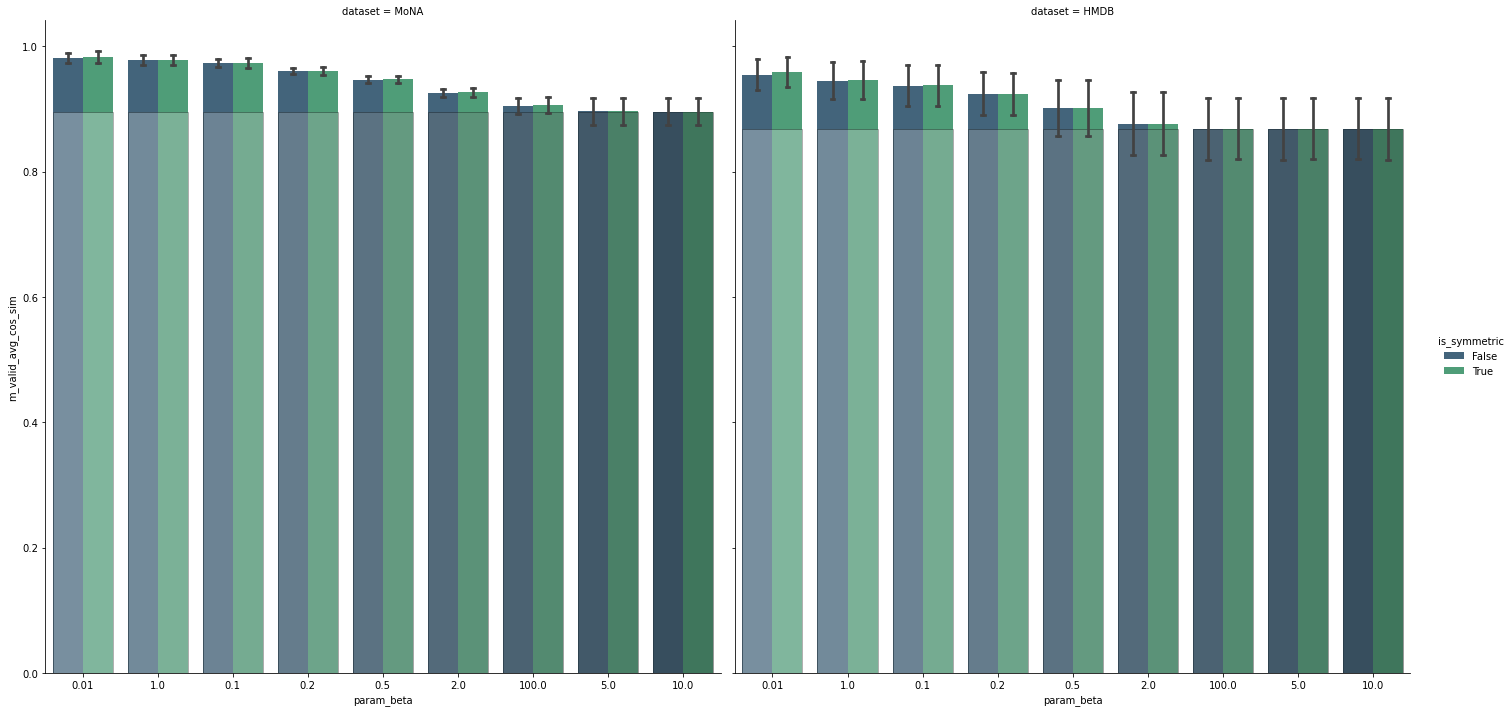

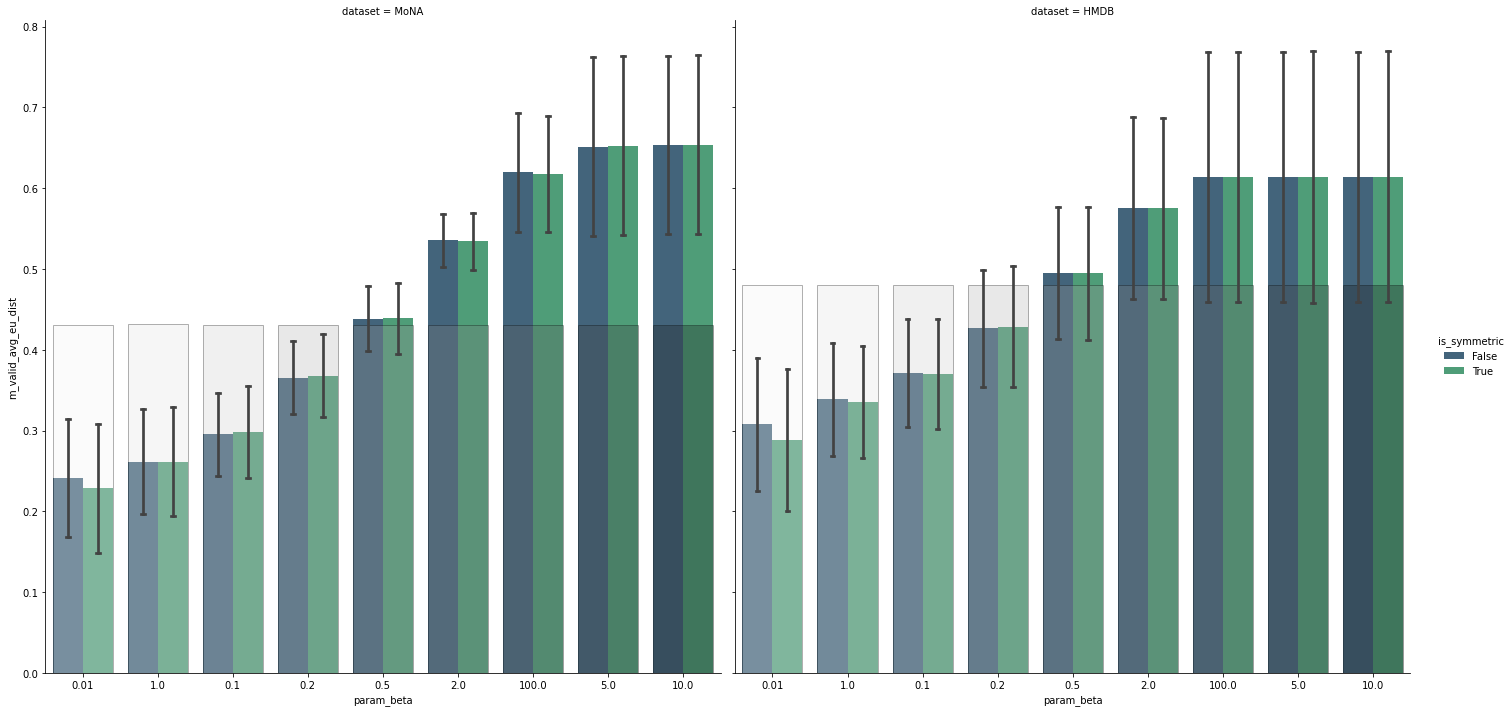

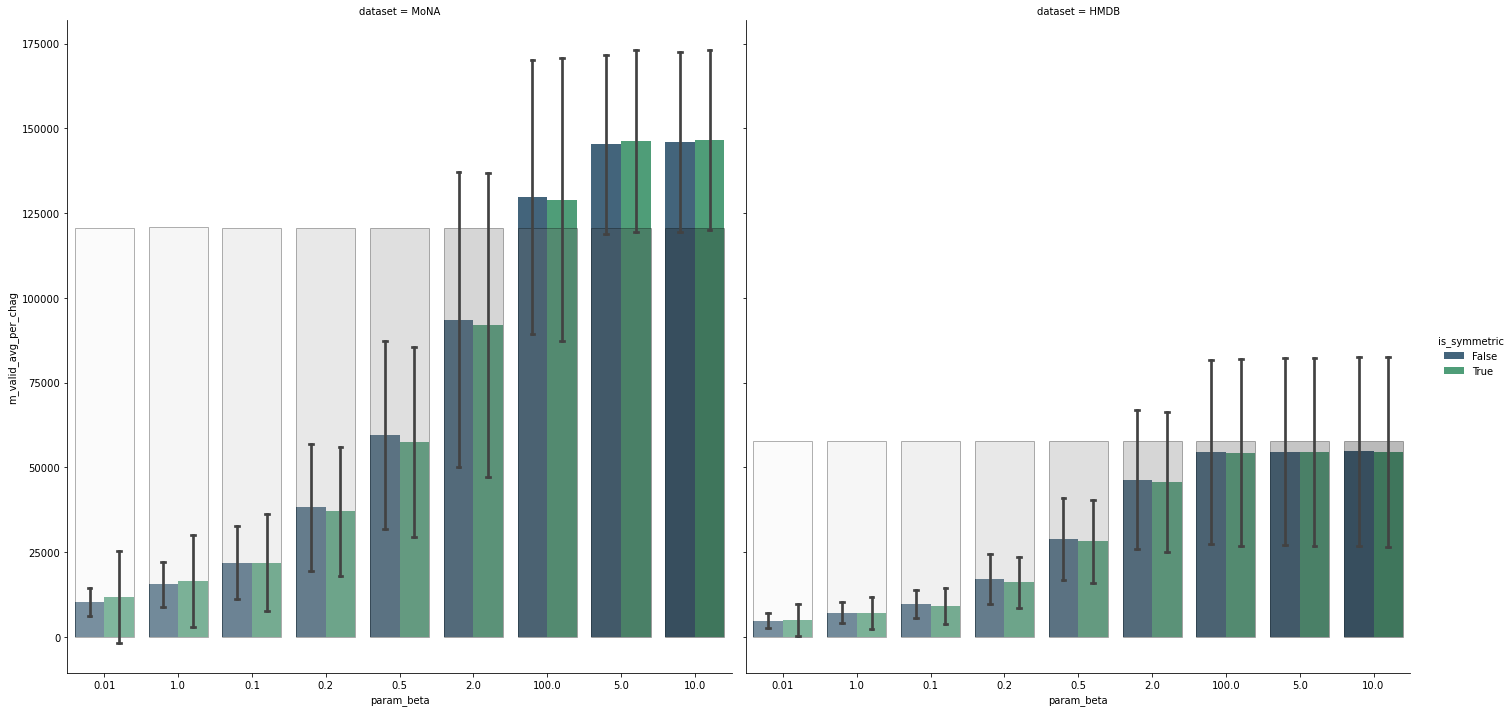

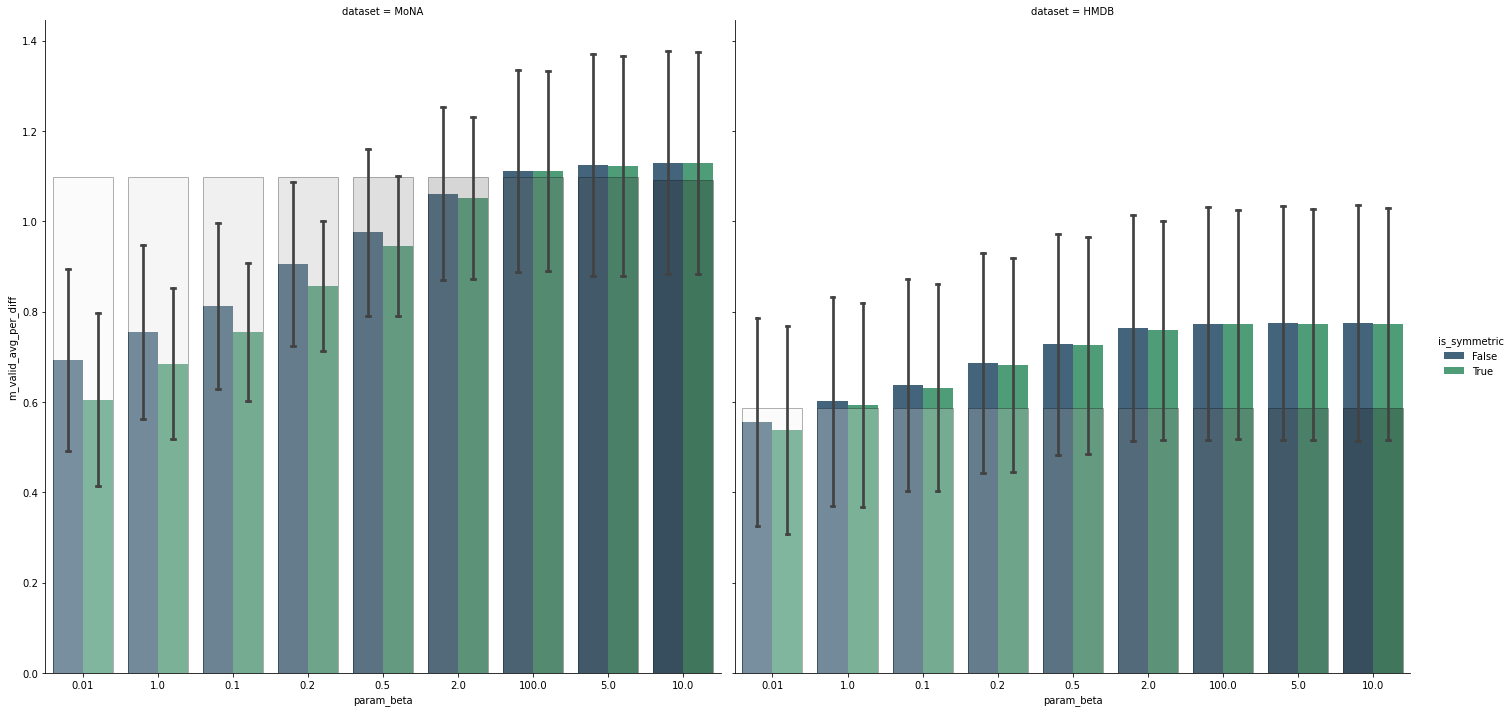

In [54]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x='param_beta', y=column, col='dataset', hue='is_symmetric',
        kind="bar", ci="sd", capsize=.05, aspect=1., palette='viridis', saturation=0.6, height=10)
    ax.map(sns.barplot, 'param_beta', avg_column, data=df, alpha=0.3, linewidth=1., palette='Greys', 
        edgecolor="black", ci=None, order=df['param_beta'].unique().tolist())

## Scores vs depth

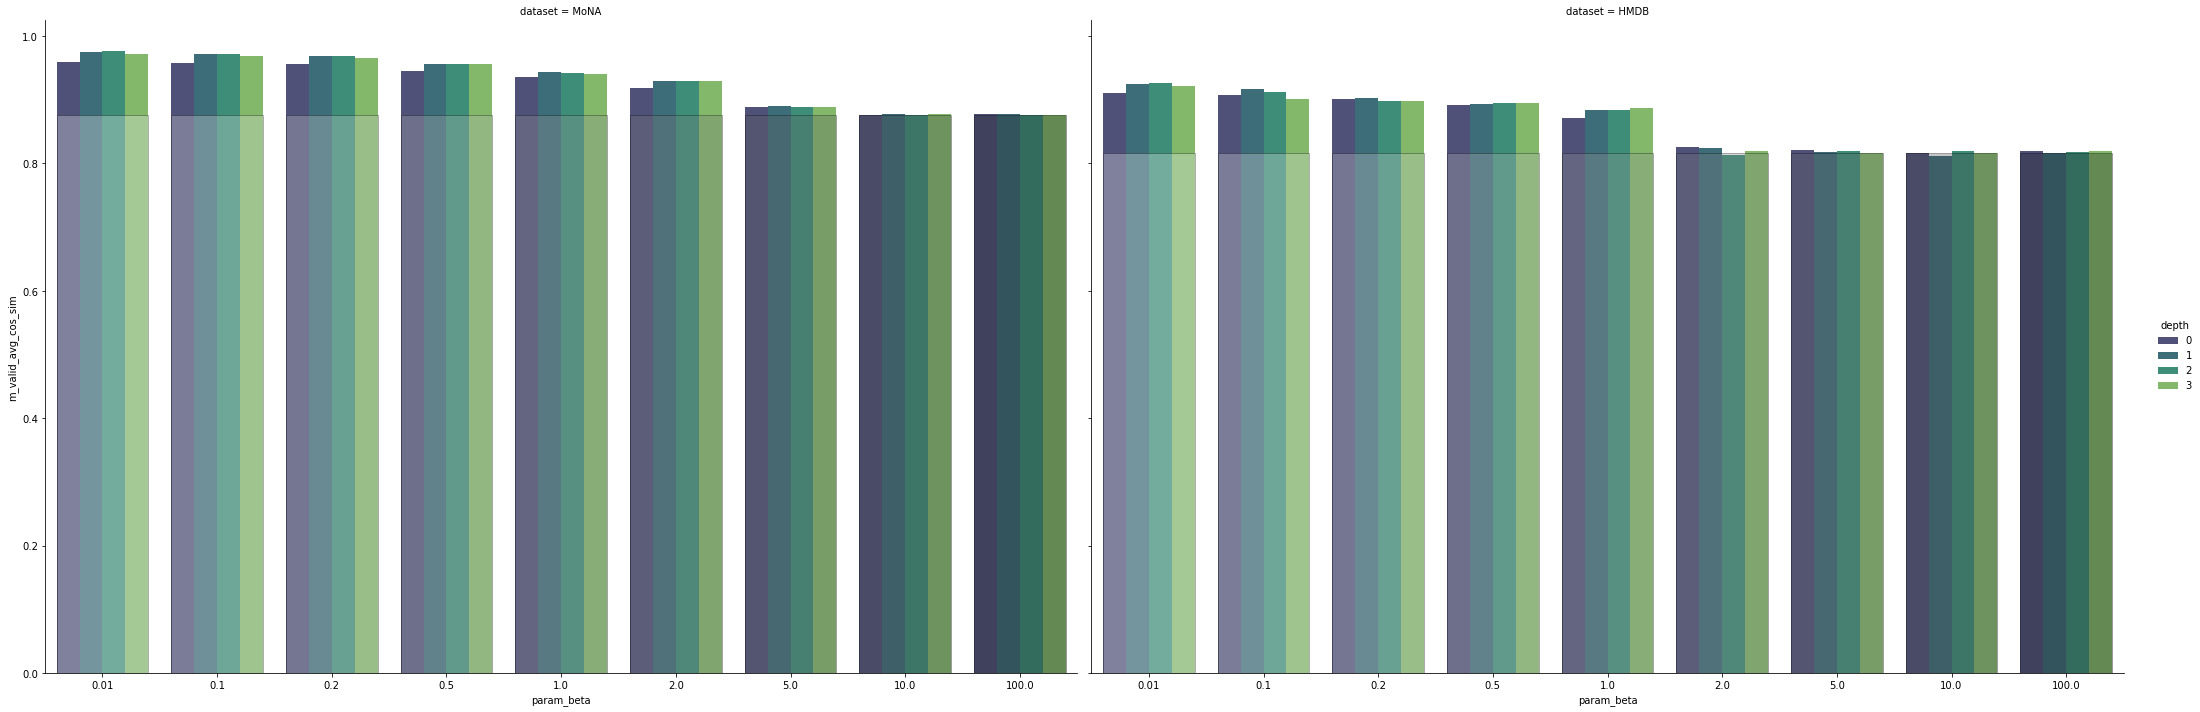

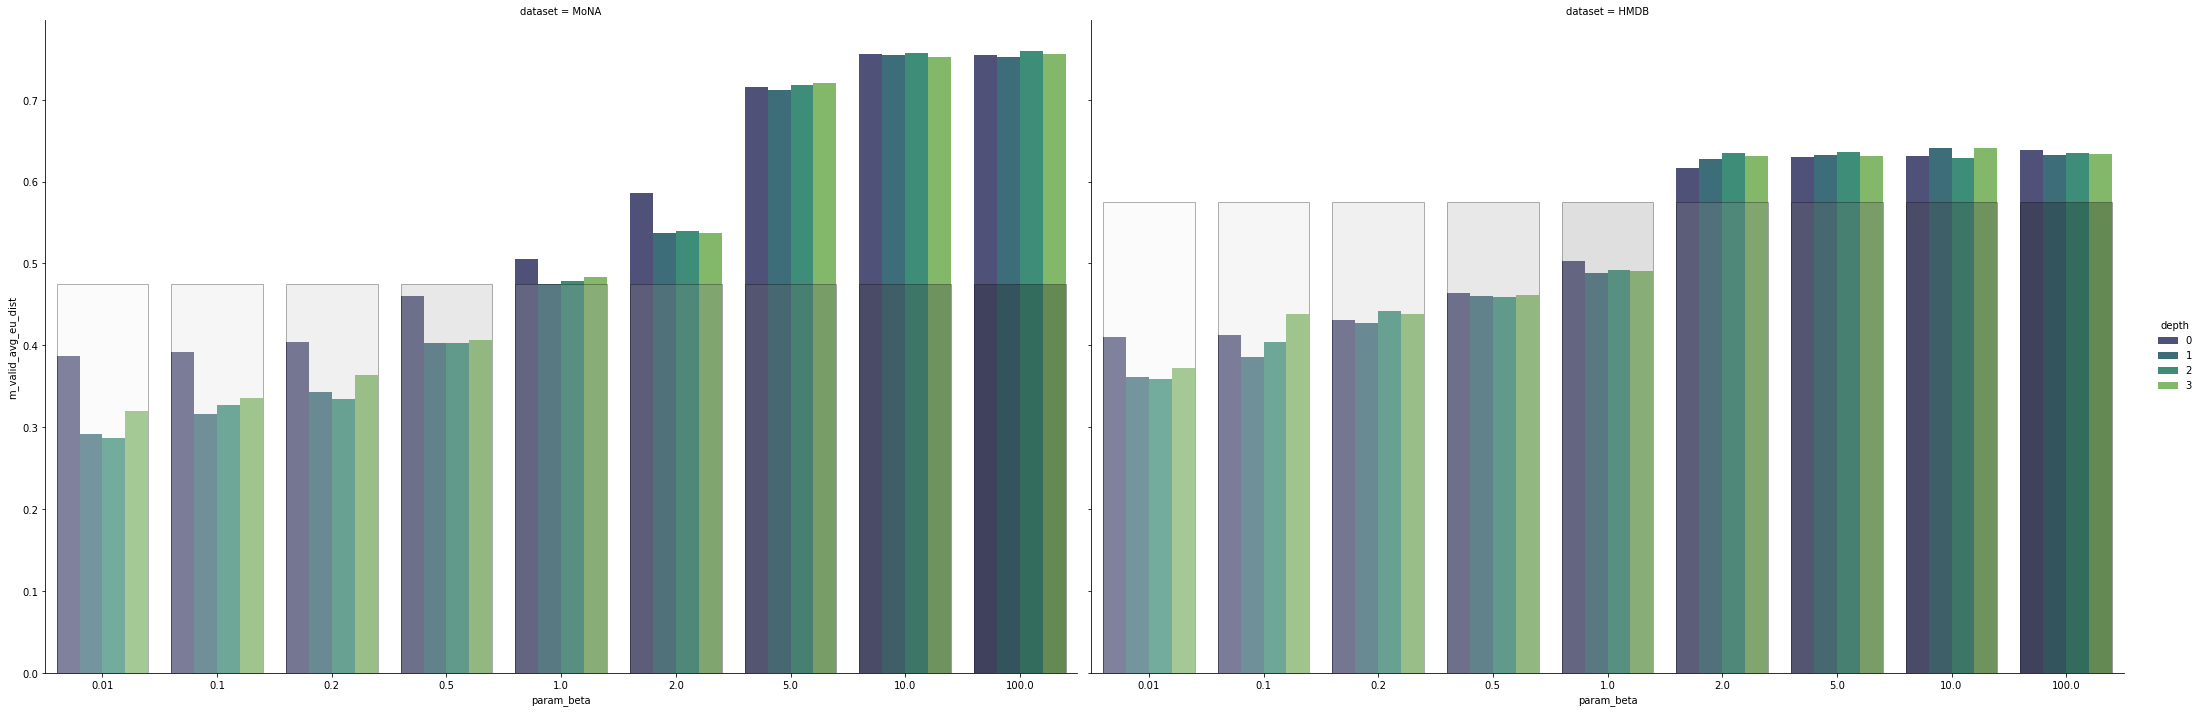

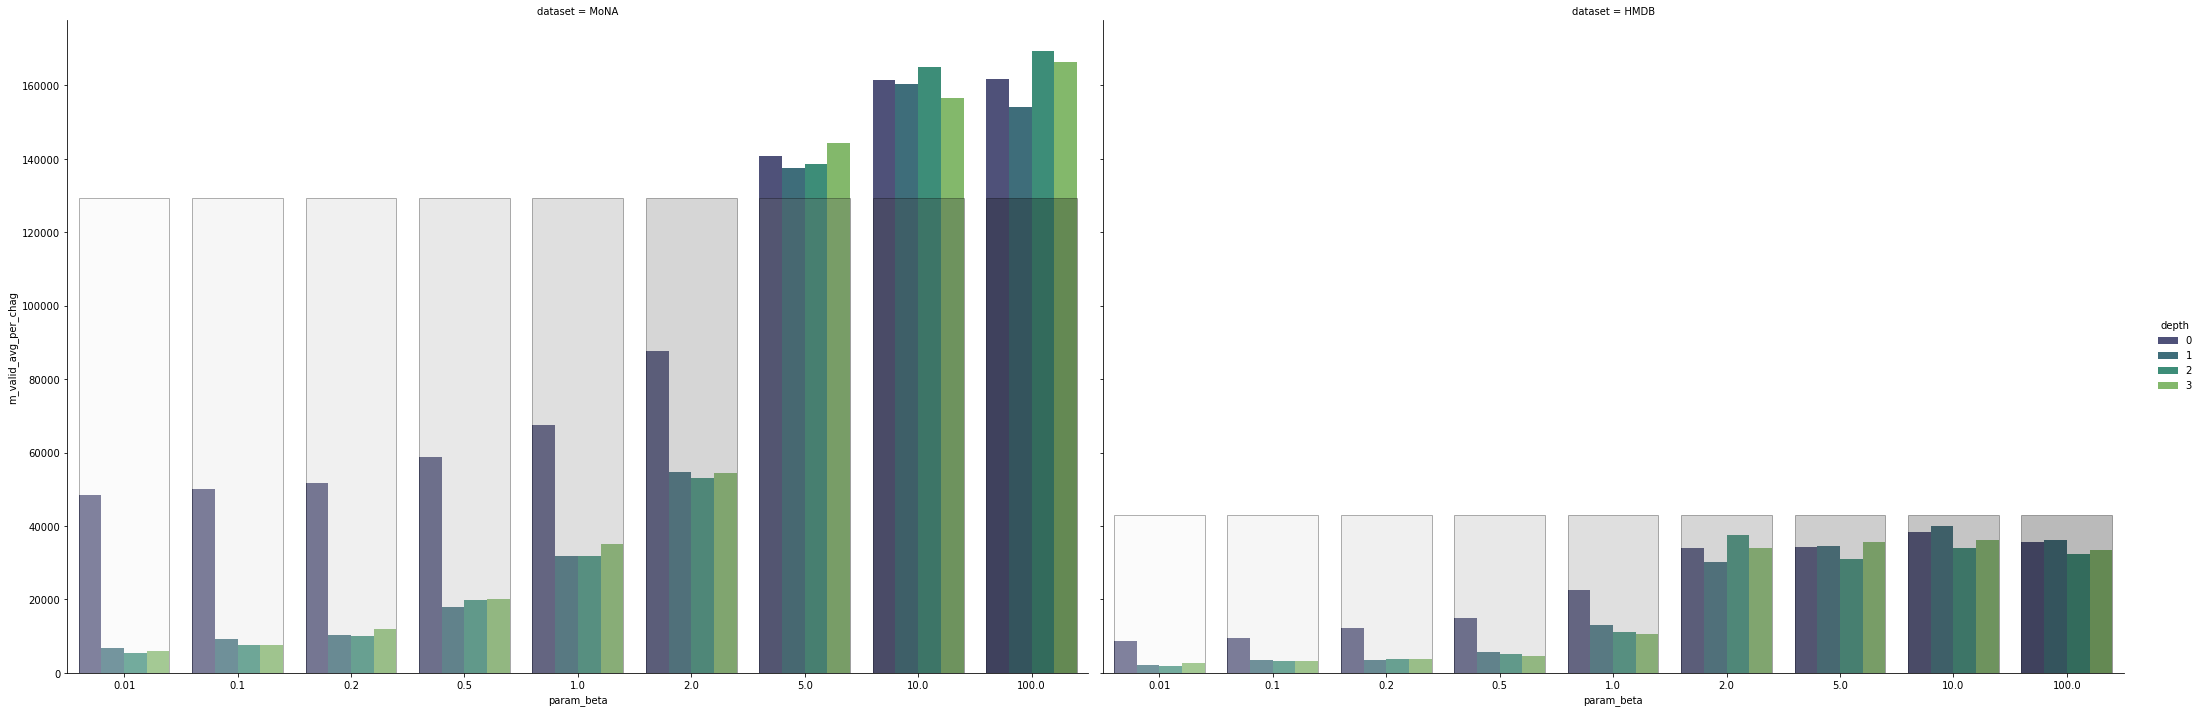

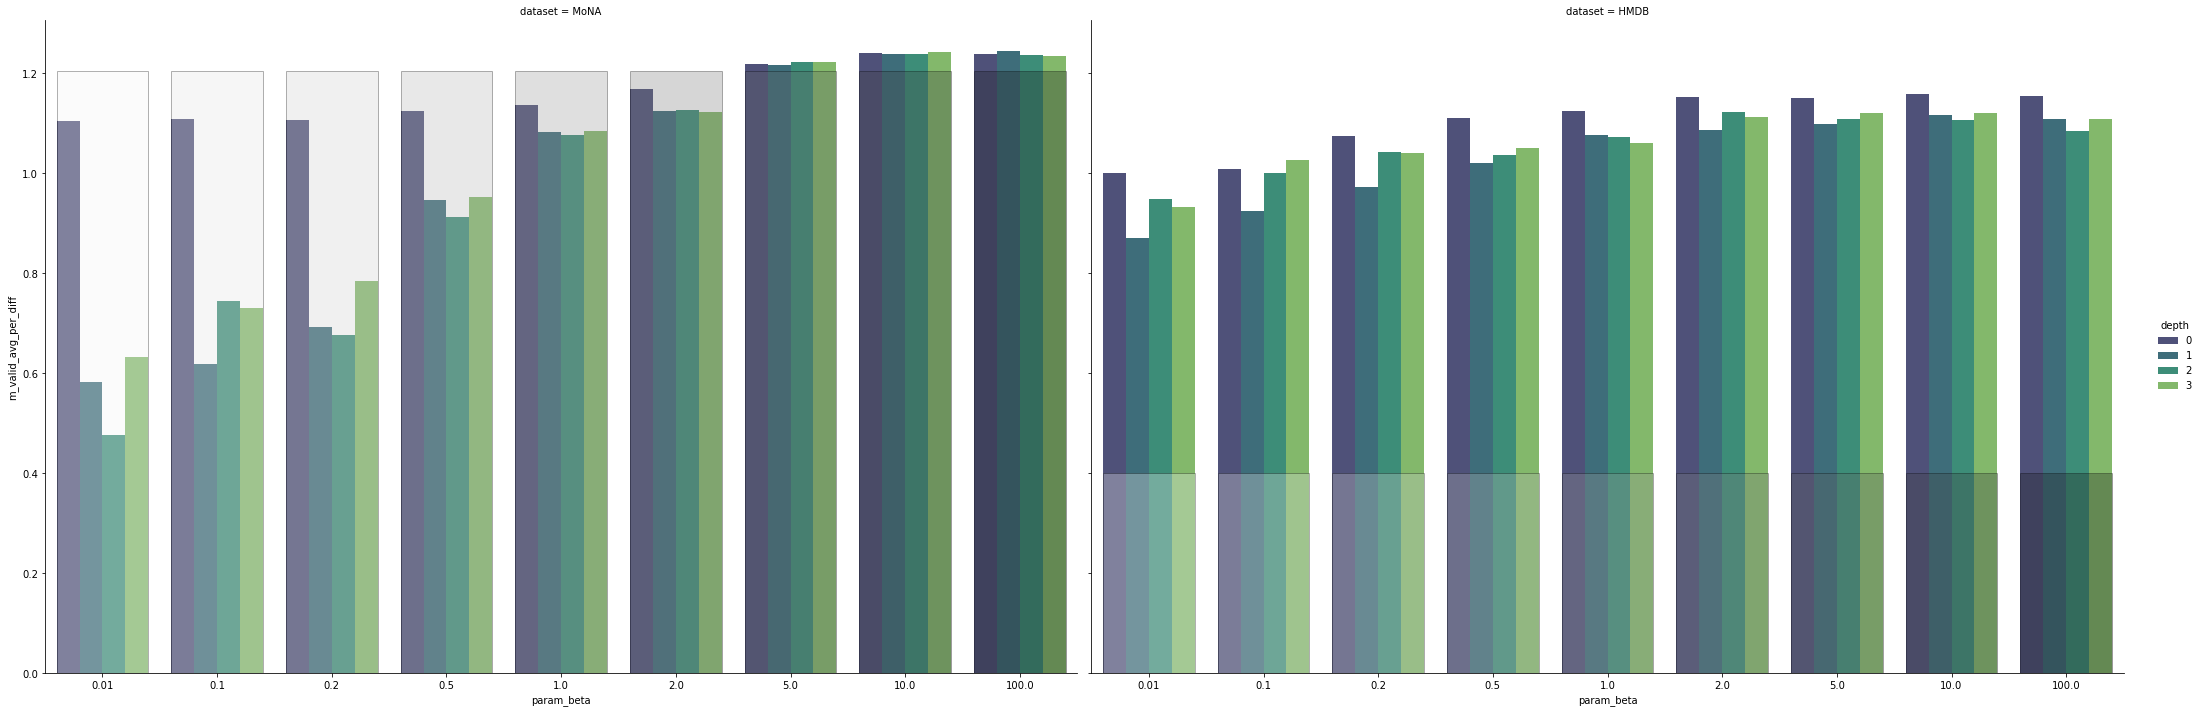

In [61]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    df_ = df[
        (df['param_latent_dim'] == 3) & 
        (df['param_max_num_peaks'] == 50) & 
        (df['param_min_intensity'] == 0.001) & 
        (df['param_rescale_intensity'] == False) & 
        (df['is_symmetric'] == True)
    ]
    ax = sns.catplot(data=df_, x='param_beta', y=column, col='dataset', hue='depth',
        kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='viridis', saturation=0.6)
    ax.map(sns.barplot, 'param_beta', avg_column, data=df_, alpha=0.3, linewidth=1., palette='Greys', 
        edgecolor="black", ci=None, order=sorted(df['param_beta'].unique().tolist()))

    plt.savefig(f'../.img/betavae/betavae-depth-{column}.svg')

## Scores vs. architecture

In [36]:
# for column, avg_column in zip(vae_scores, vae_avg_scores):
#     ax = sns.catplot(data=df, x=column, y="layer_config", row='dataset', hue='param_beta',
#         kind="bar", ci="sd", capsize=.05, aspect=0.3, palette='viridis', saturation=0.6, height=50)
#     ax.map(sns.barplot, avg_column, "layer_config", data=df, alpha=0.3, linewidth=1., palette='Greys', 
#         edgecolor="black", ci=None, order=df['layer_config'].unique().tolist())

## Scores vs. Latent dim

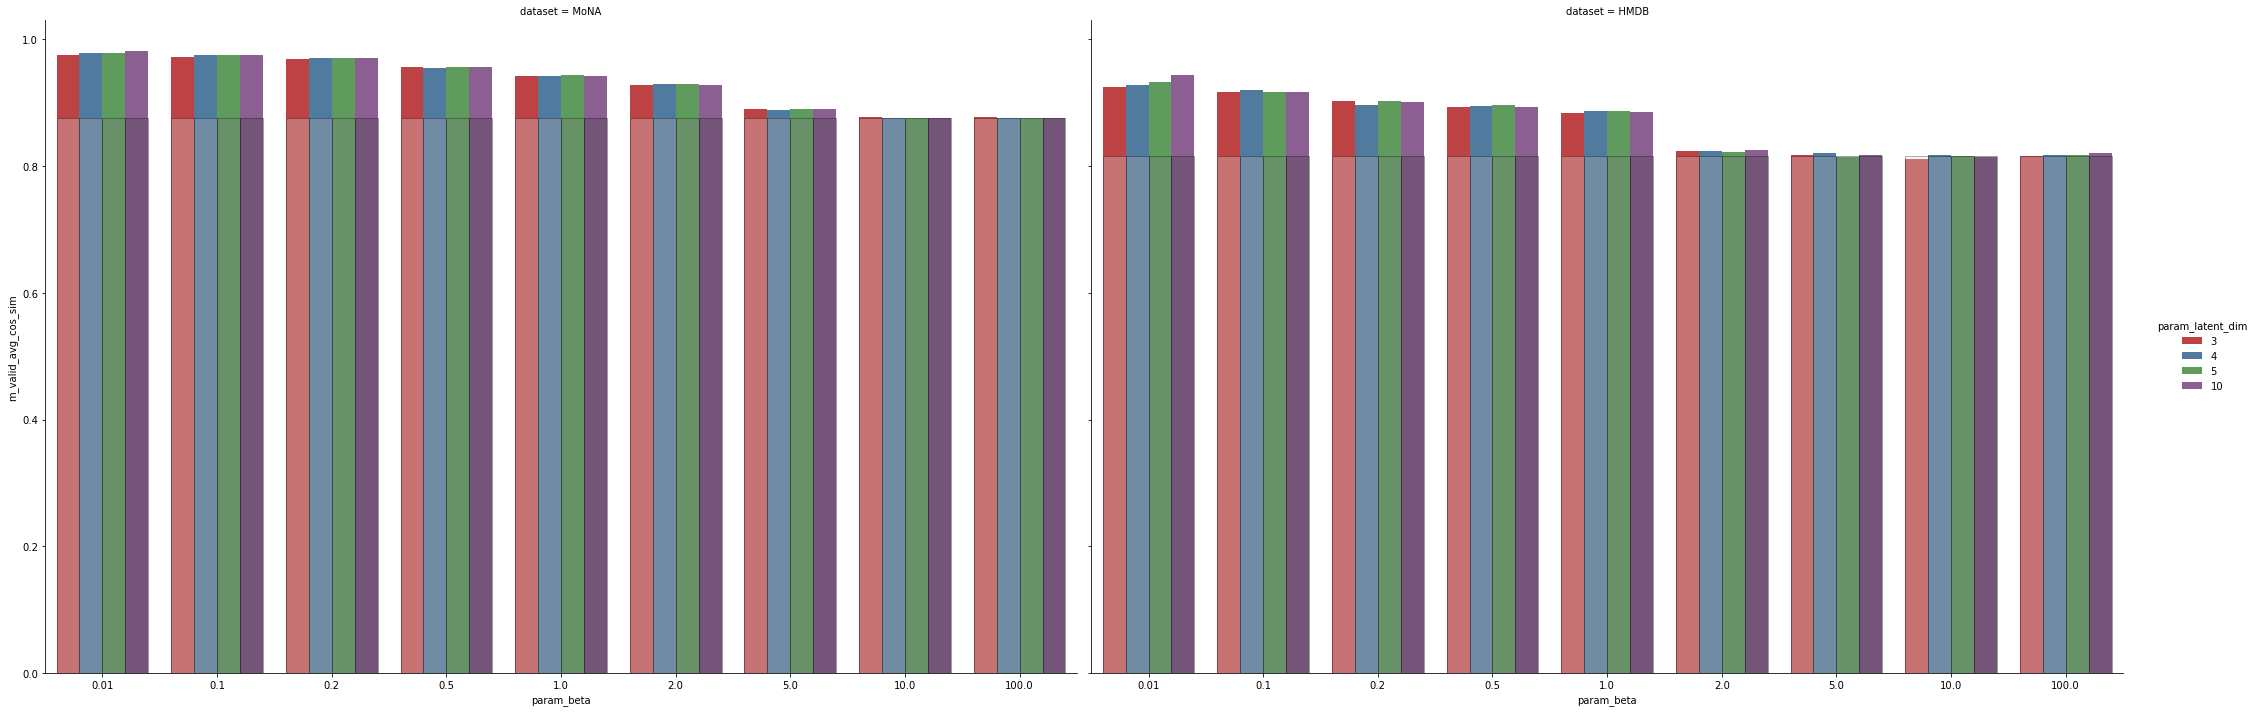

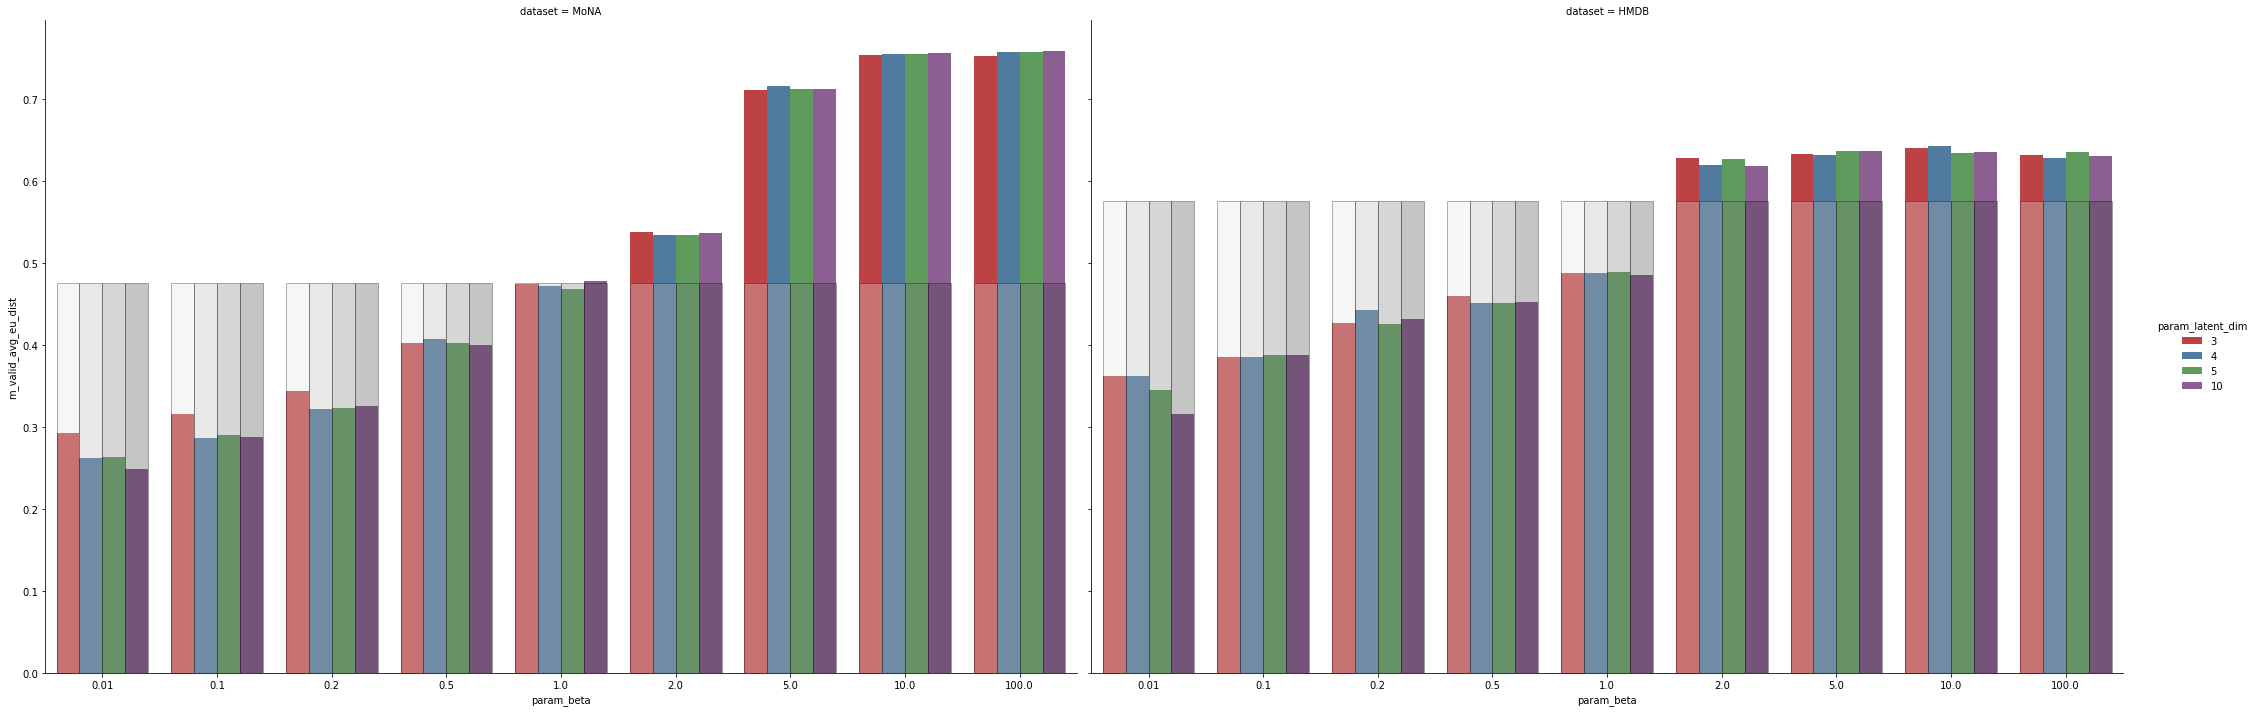

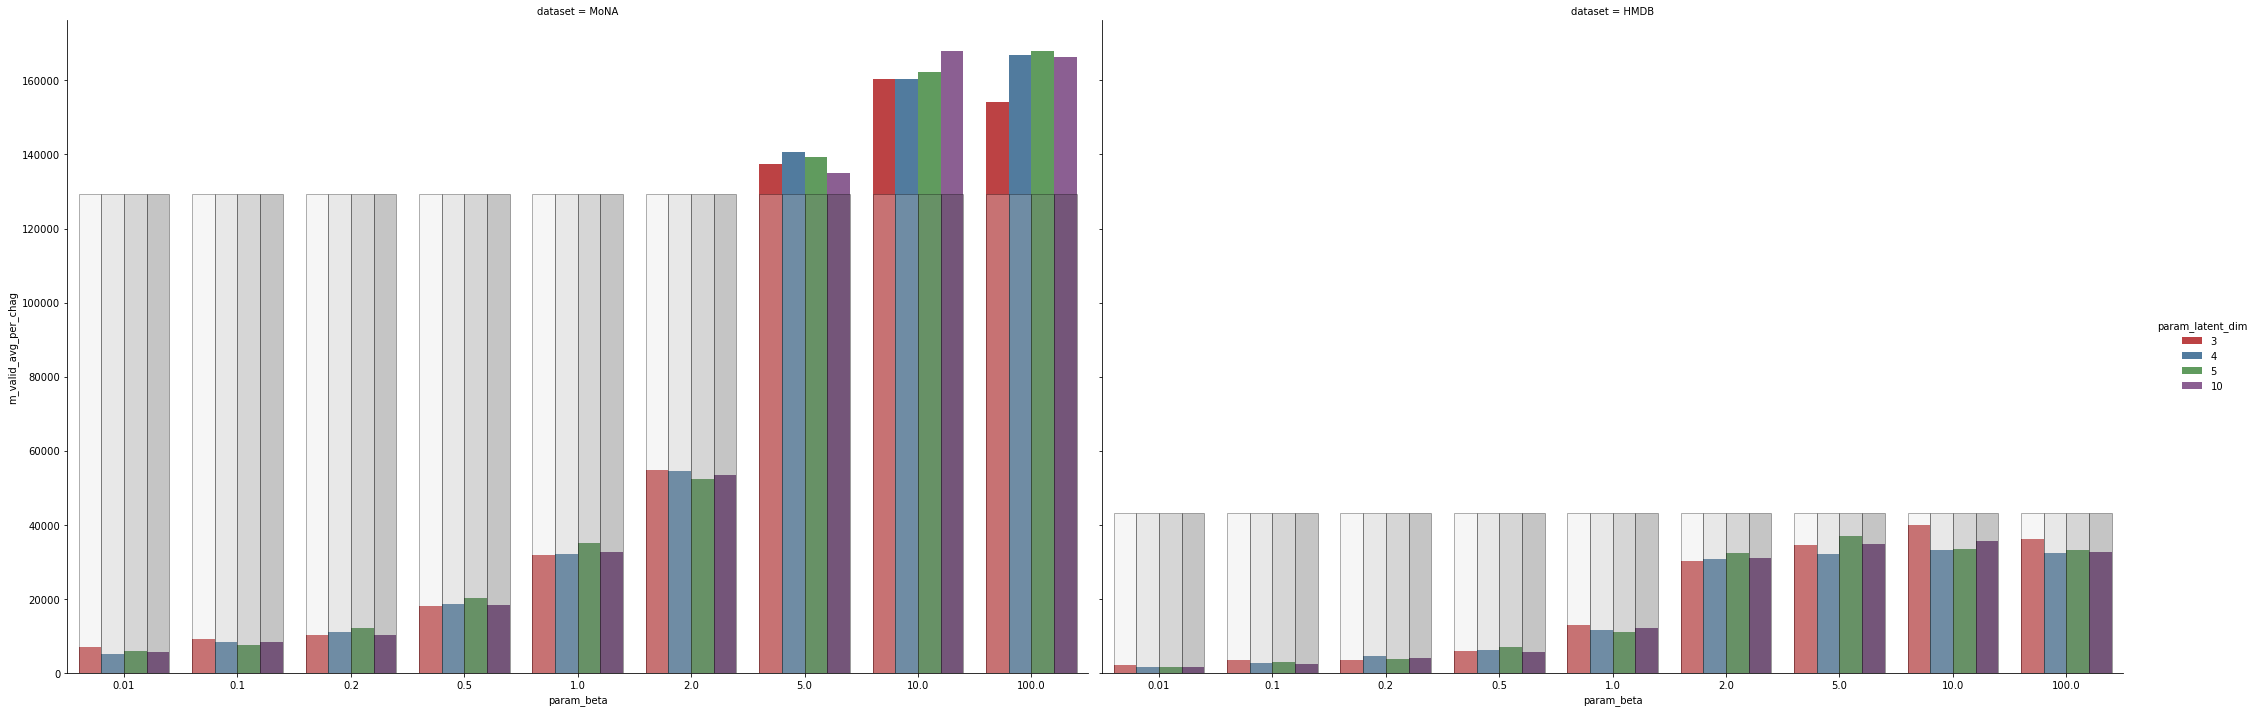

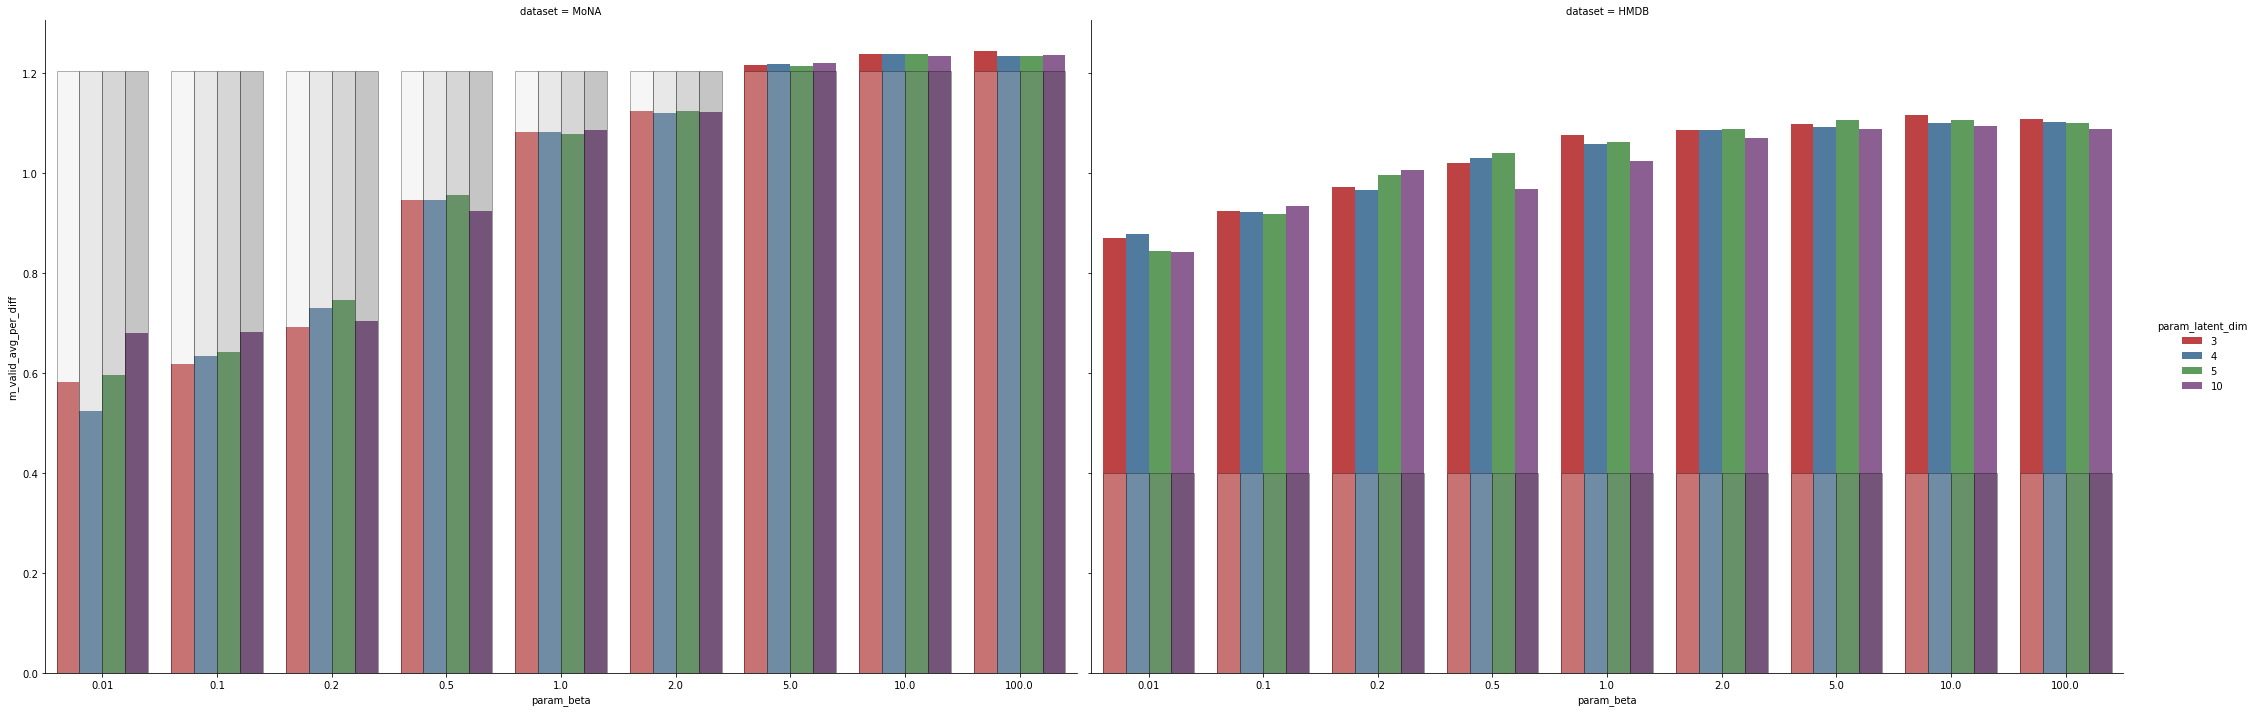

In [37]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    df_ = df[
        (df['param_max_num_peaks'] == 50) & 
        (df['param_min_intensity'] == 0.001) & 
        (df['param_rescale_intensity'] == False) & 
        (df['depth'] == 1) & 
        (df['is_symmetric'] == True)
    ]
    ax = sns.catplot(data=df_, x="param_beta", y=column, col='dataset',
        hue='param_latent_dim', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'param_beta', avg_column, data=df_, hue='param_latent_dim', order=sorted(df['param_beta'].unique().tolist()),
        ci="sd", capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")
    plt.savefig(f'../.img/betavae/betavae-latent-dim-{column}.svg')

## Scores vs. number of peaks

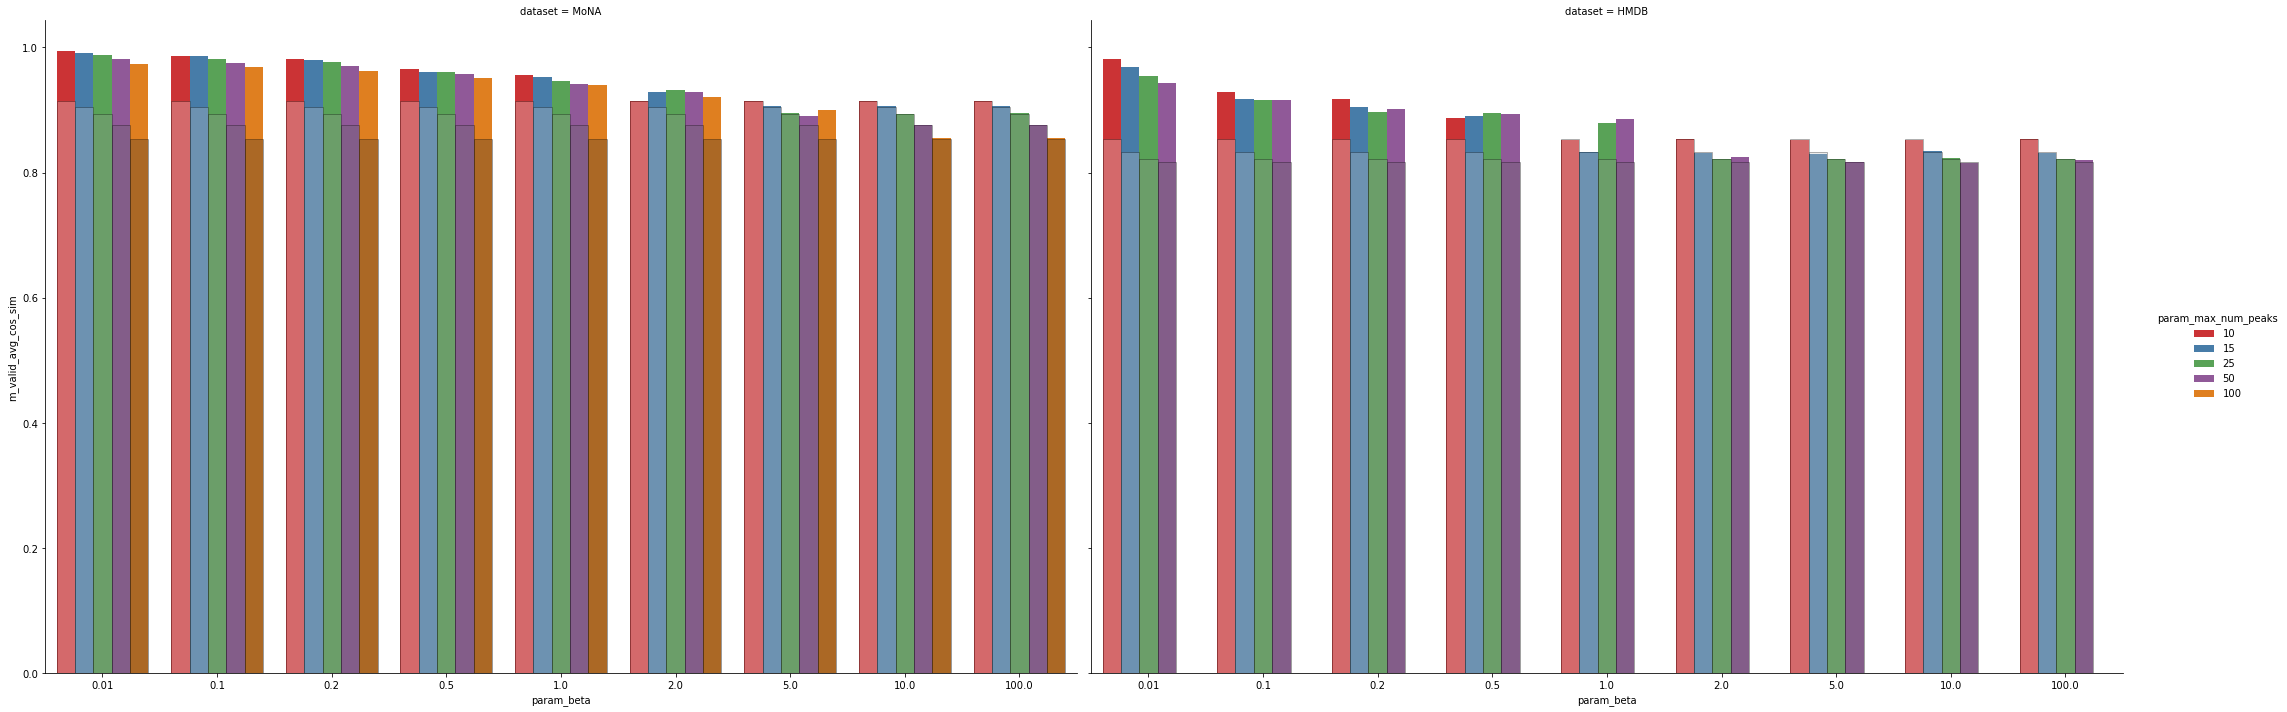

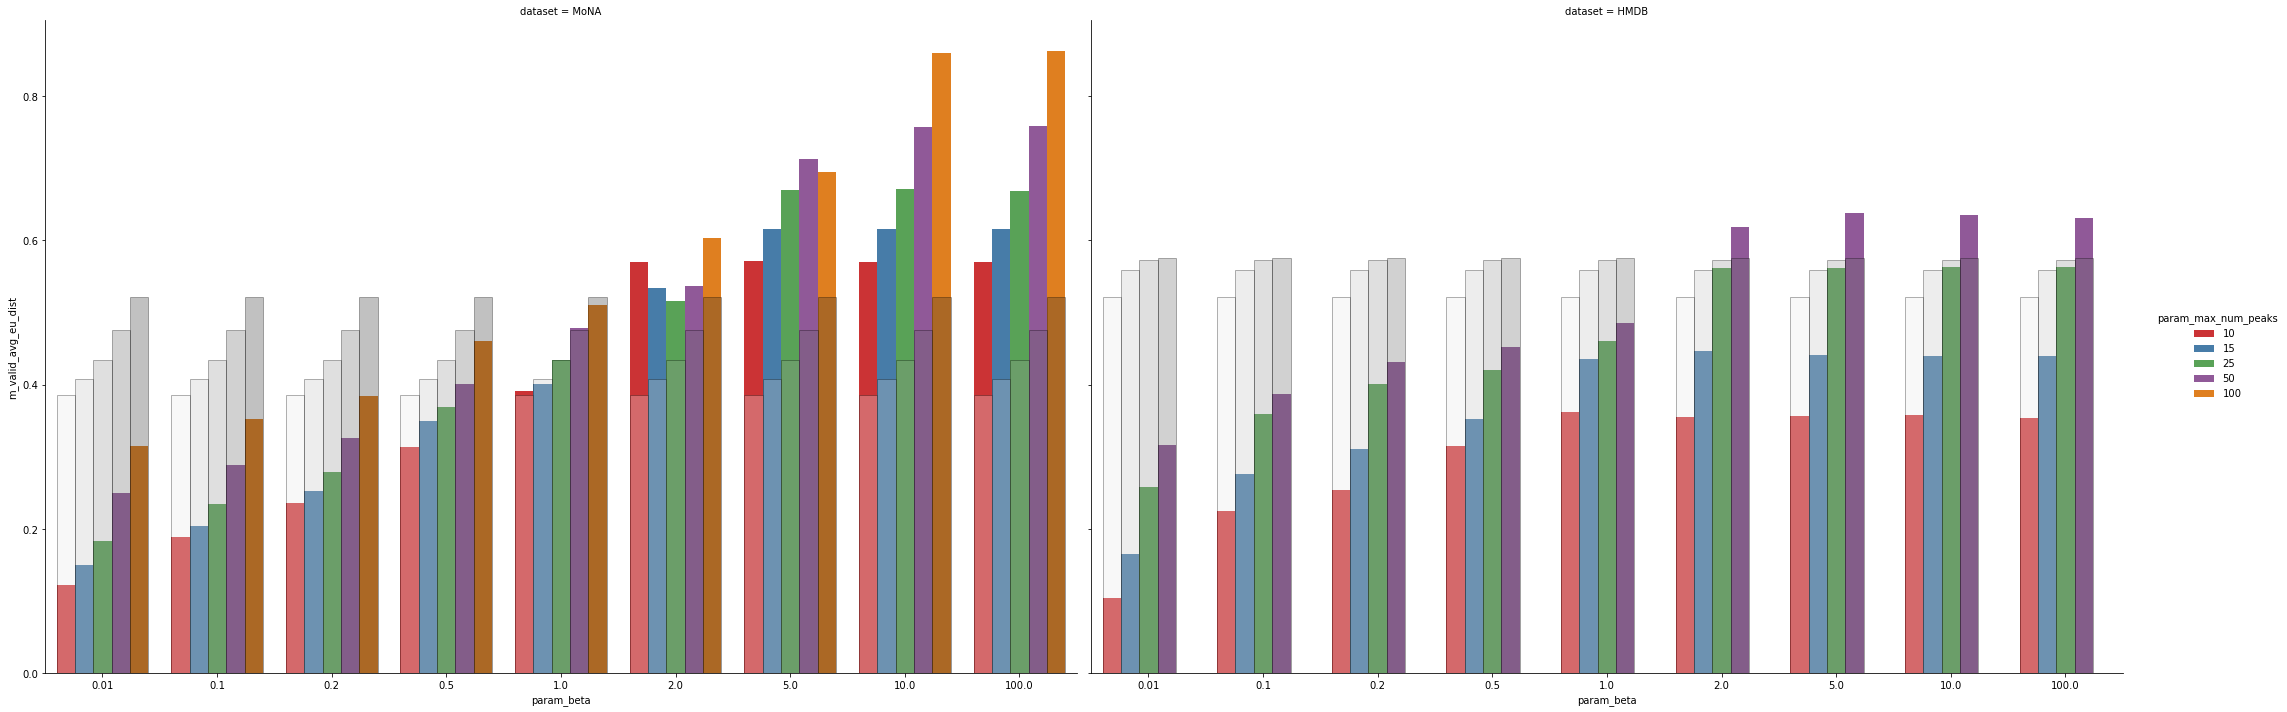

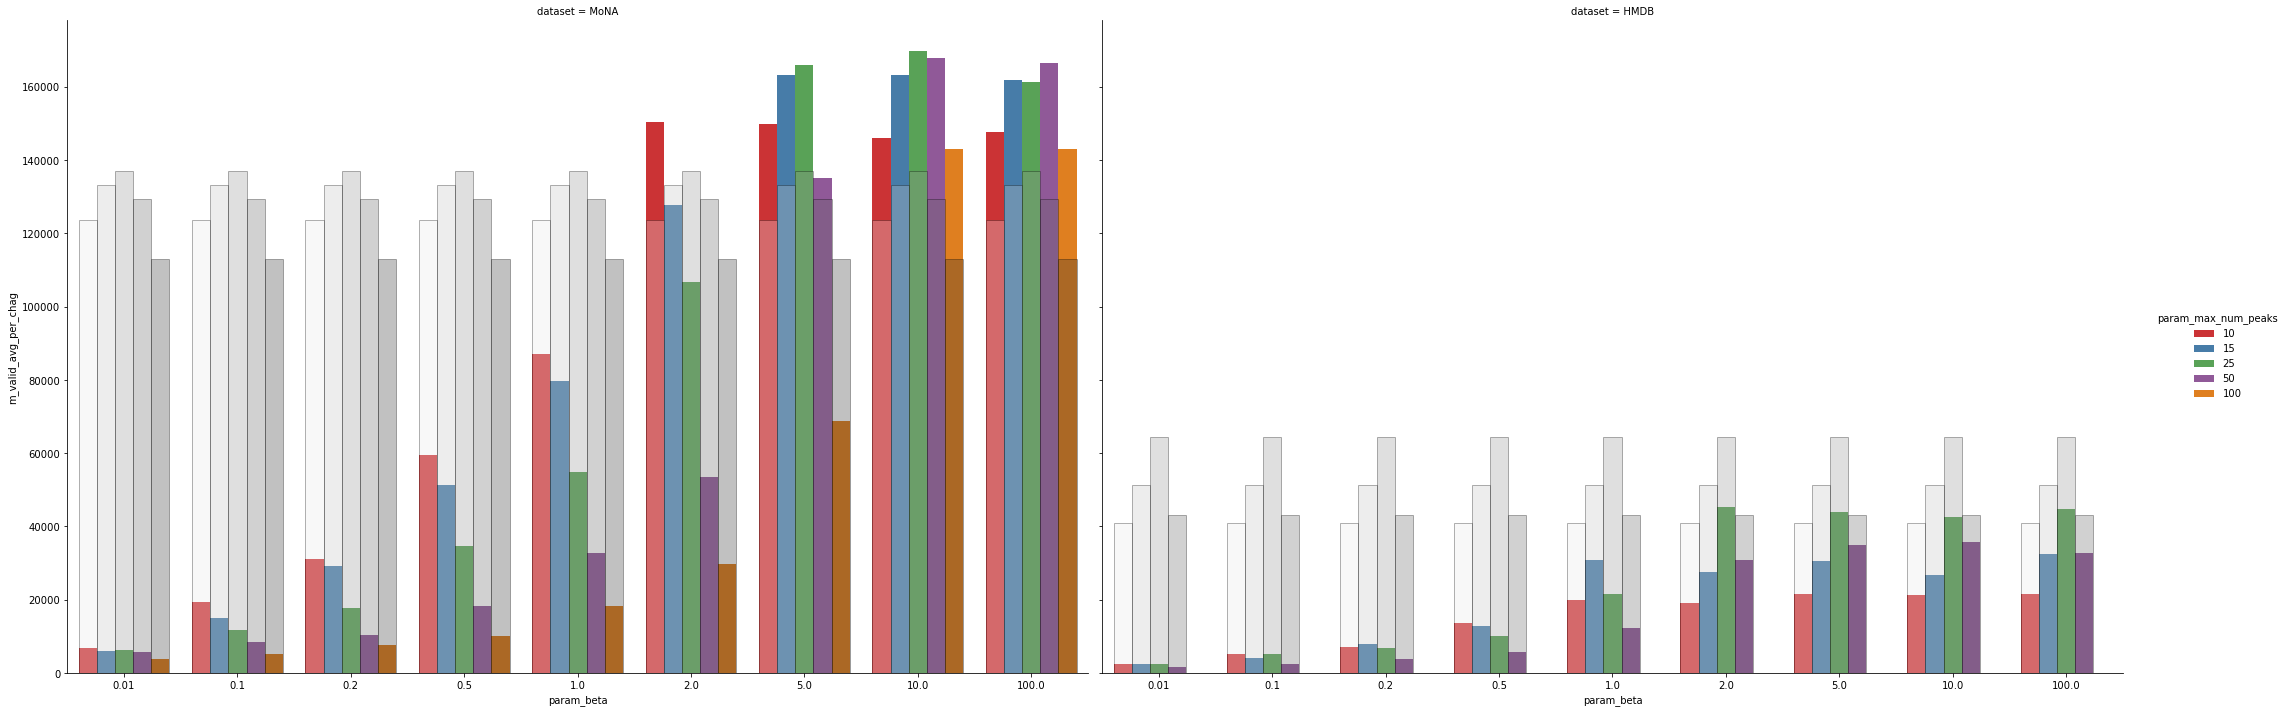

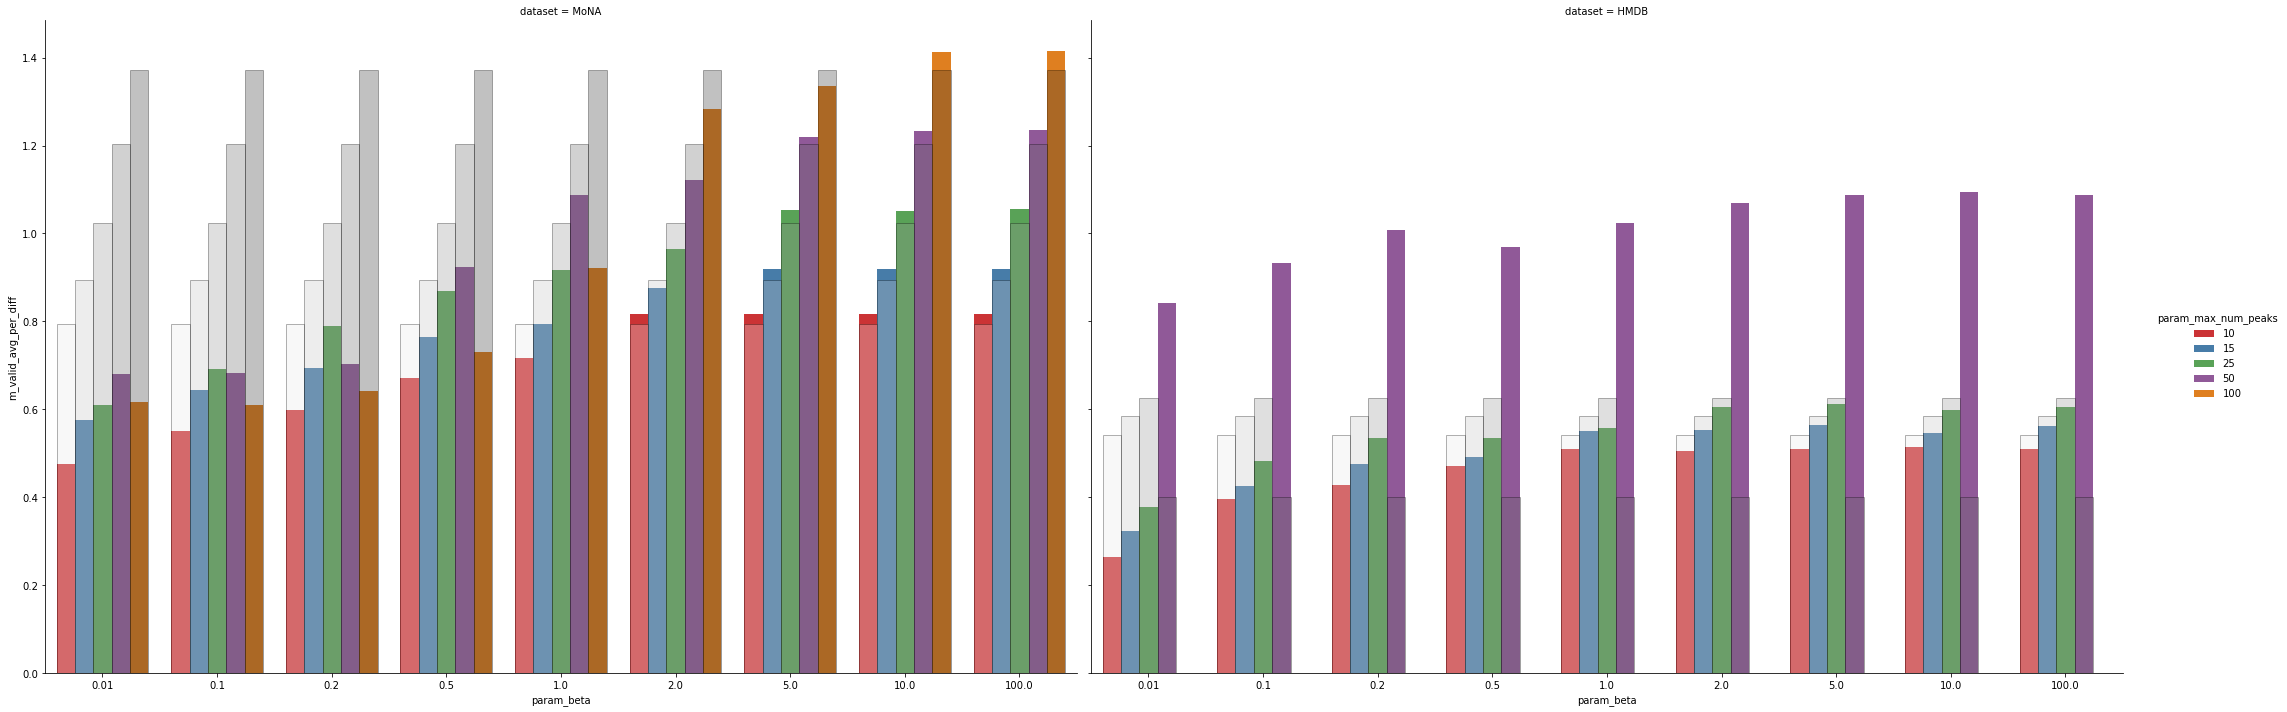

In [38]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    df_ = df[
        (df['param_latent_dim'] == 10) & 
        (df['param_min_intensity'] == 0.001) & 
        (df['param_rescale_intensity'] == False) & 
        (df['depth'] == 1) & 
        (df['is_symmetric'] == True)
    ]
    ax = sns.catplot(data=df_, x="param_beta", y=column, col='dataset',
        hue='param_max_num_peaks', kind="bar", ci="sd", height=10, aspect=1.5, palette='Set1')
    ax.map(sns.barplot, 'param_beta', avg_column, data=df_, hue='param_max_num_peaks', order=sorted(df['param_beta'].unique().tolist()),
        ci="sd", capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")
    plt.savefig(f'../.img/betavae/betavae-n-peaks-{column}.svg')

## Scores vs. minimum intensity

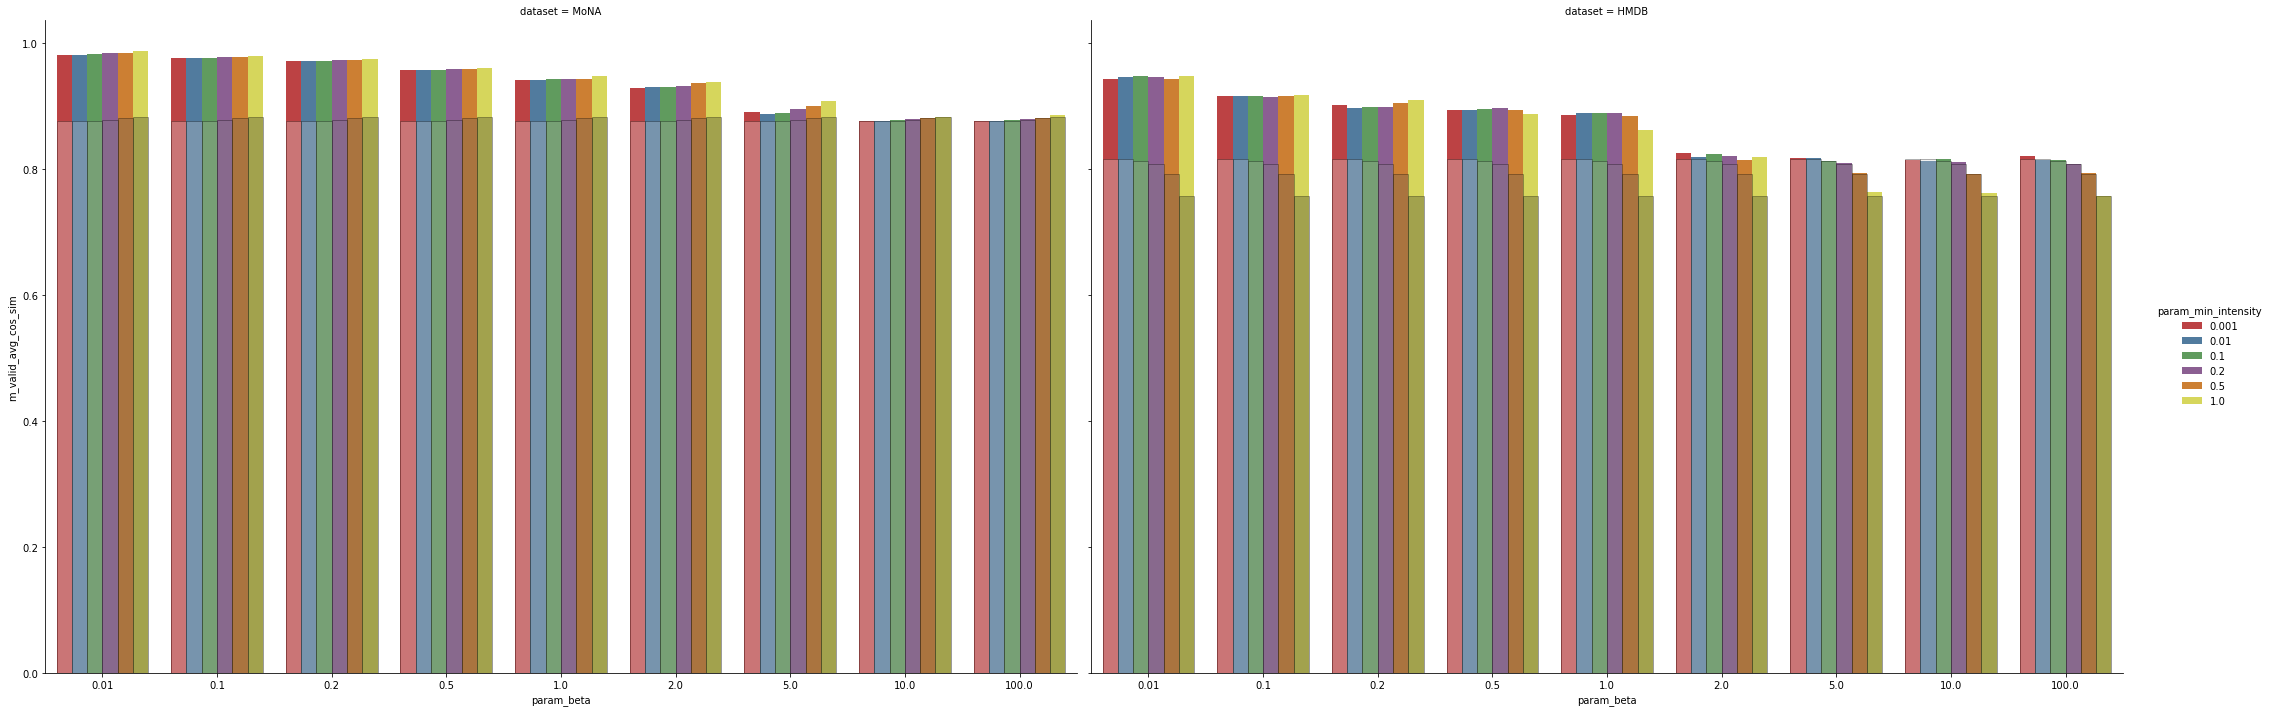

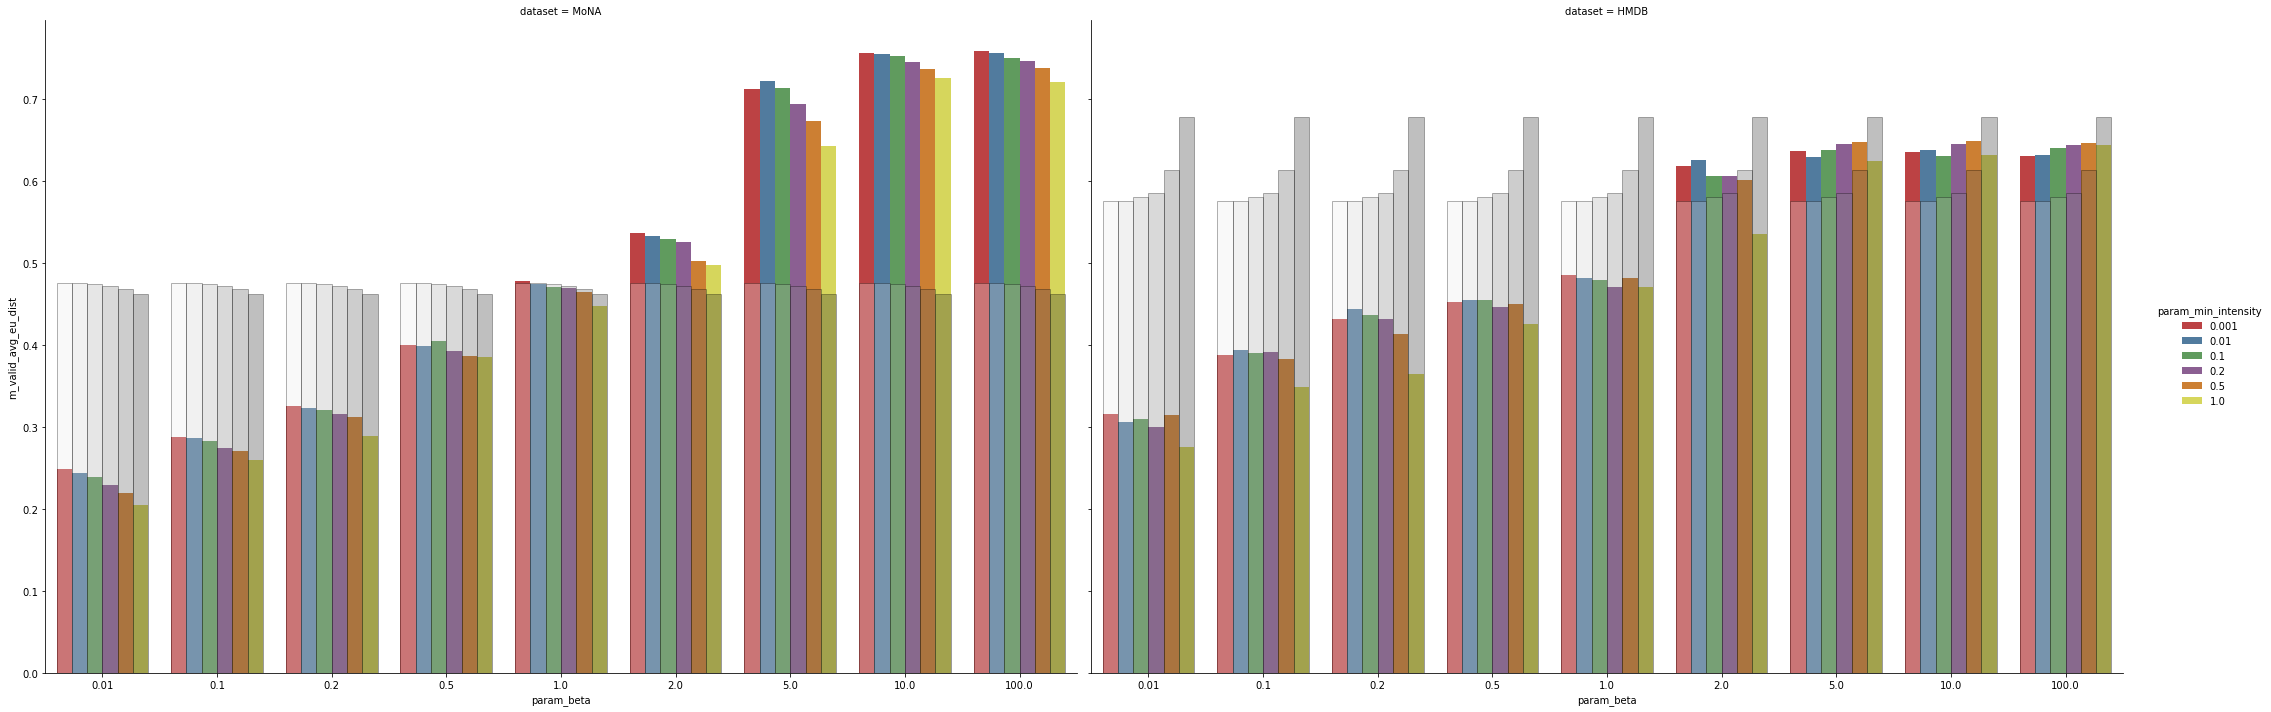

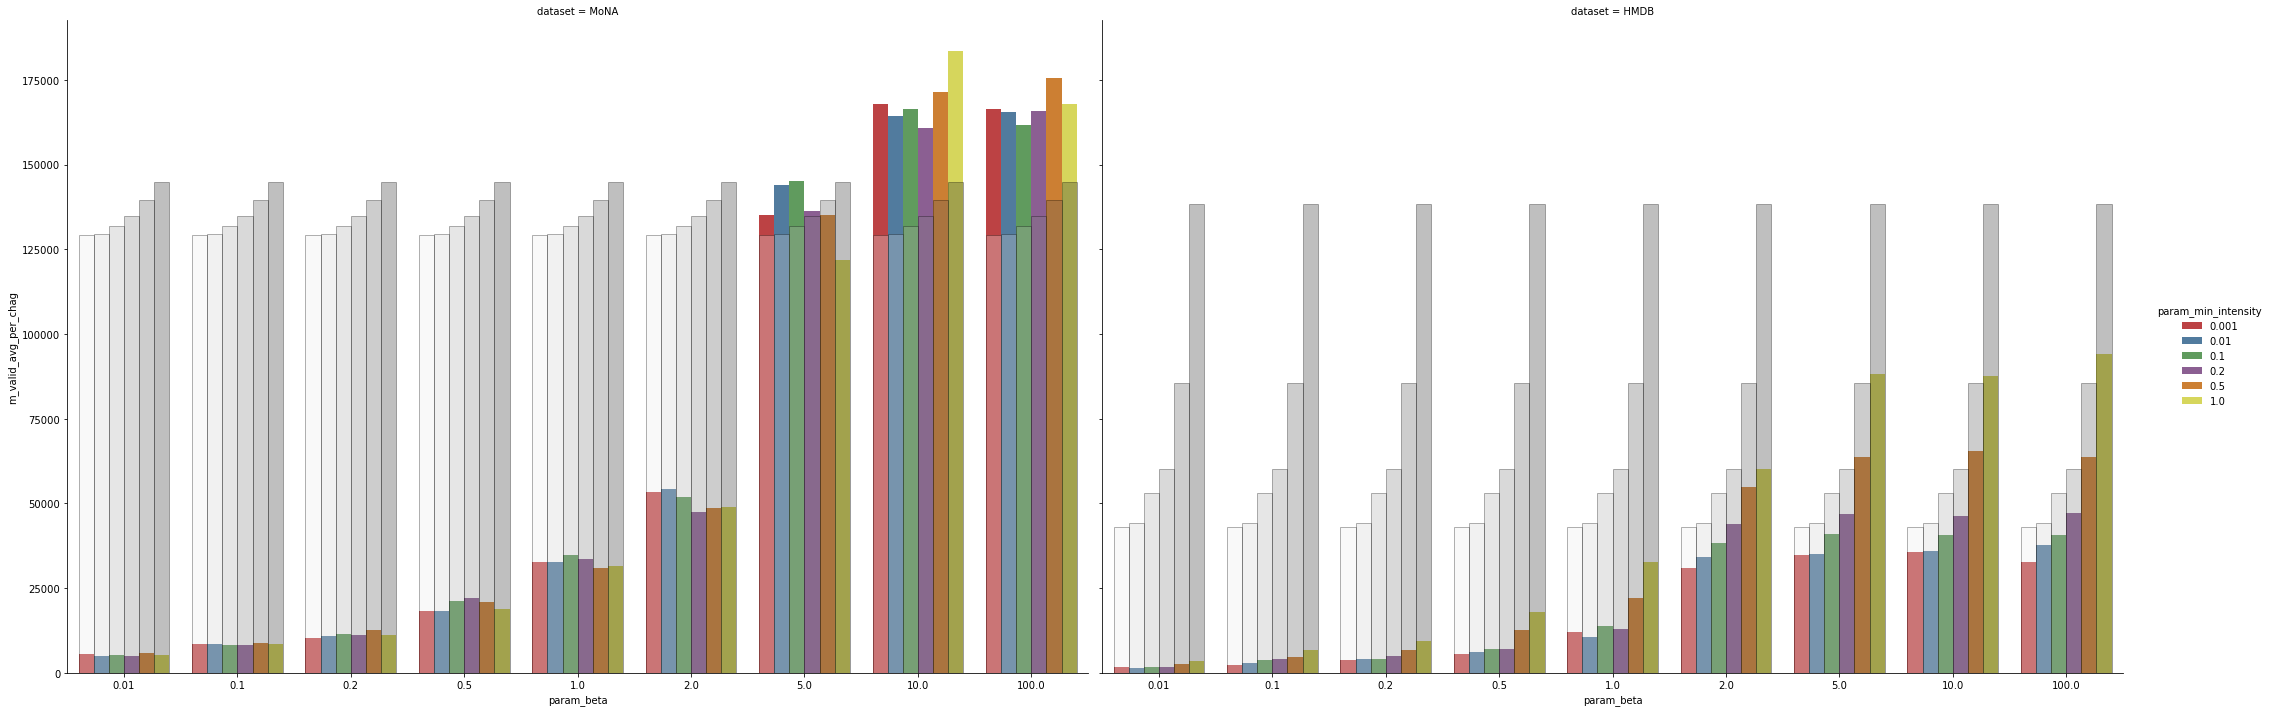

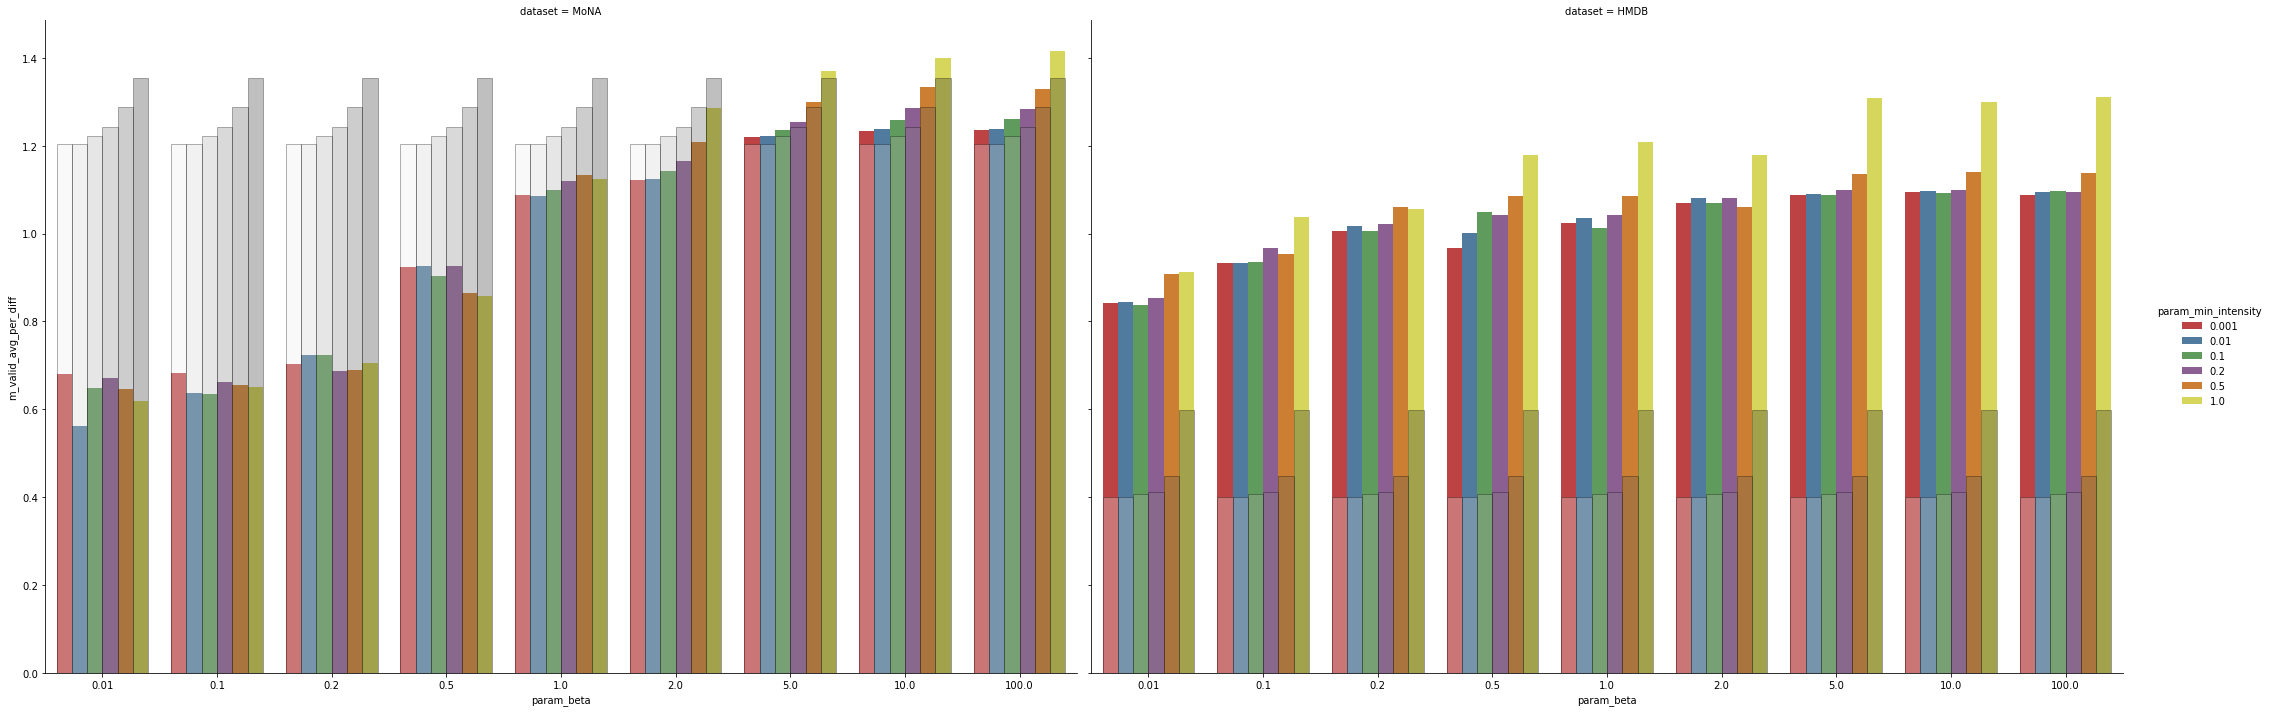

In [39]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    df_ = df[
        (df['param_latent_dim'] == 10) & 
        (df['param_max_num_peaks'] == 50) & 
        (df['param_rescale_intensity'] == False) & 
        (df['depth'] == 1) & 
        (df['is_symmetric'] == True)
    ]
    ax = sns.catplot(data=df_, x="param_beta", y=column, col='dataset',
        hue='param_min_intensity', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'param_beta', avg_column, data=df_, hue='param_min_intensity', ci="sd", order=sorted(df['param_beta'].unique().tolist()),
        capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")
    plt.savefig(f'../.img/betavae/betavae-min-intensity-{column}.svg')

## Scores vs. rescale intensity

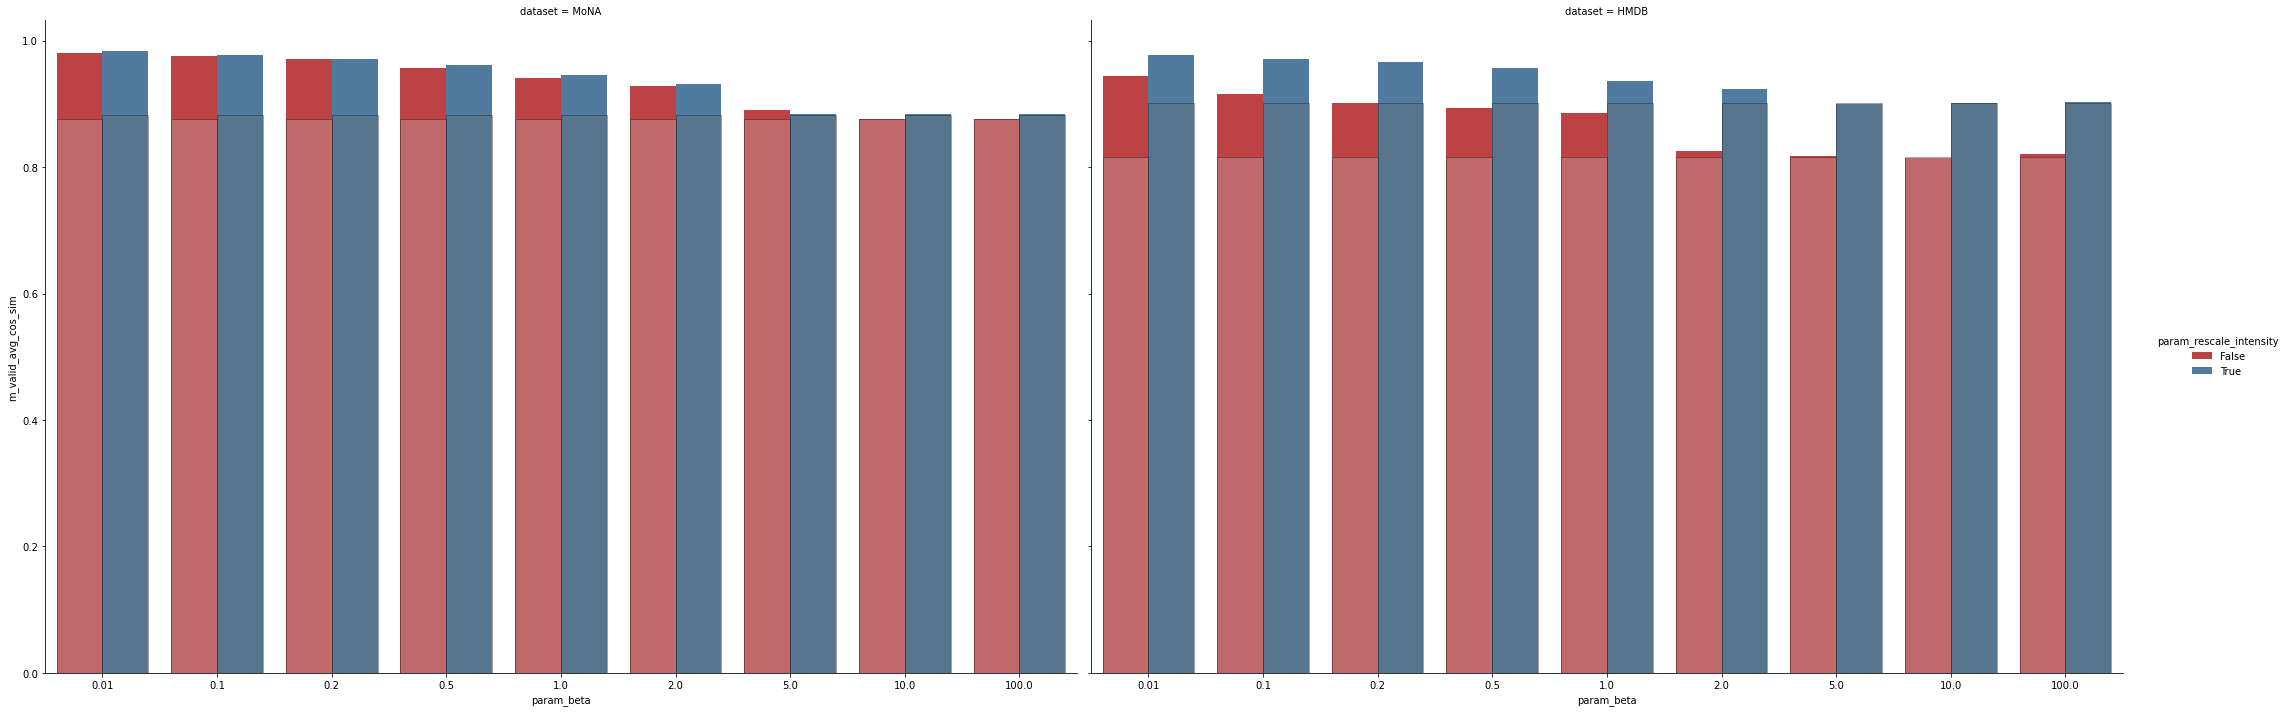

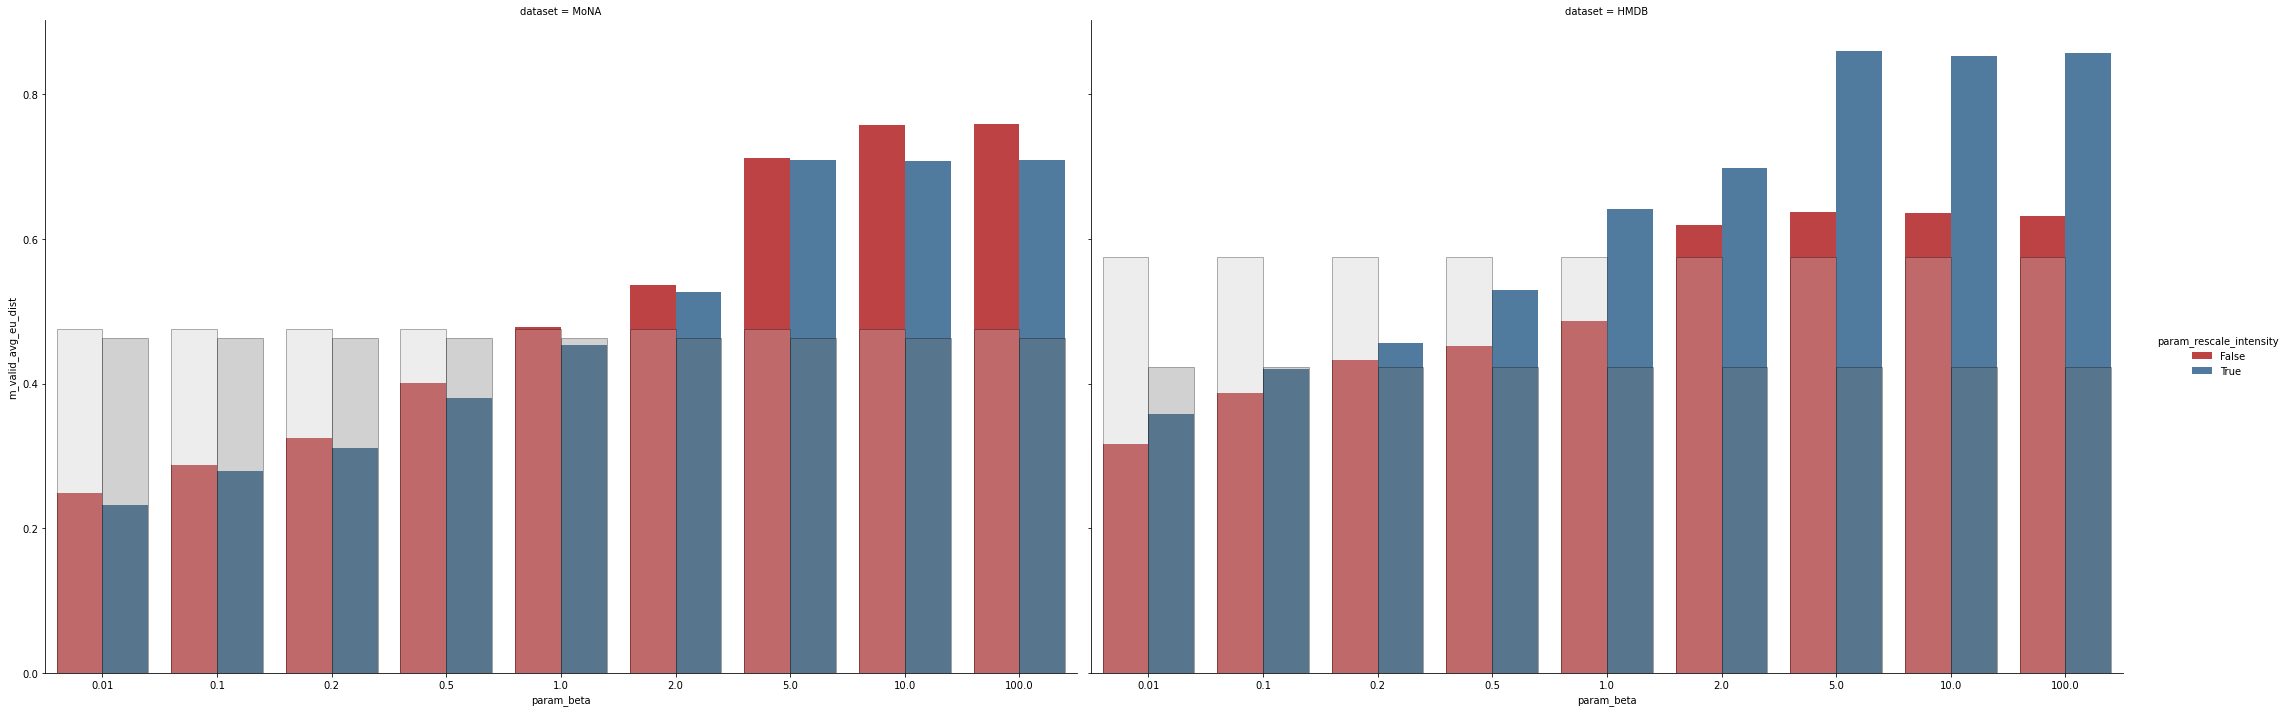

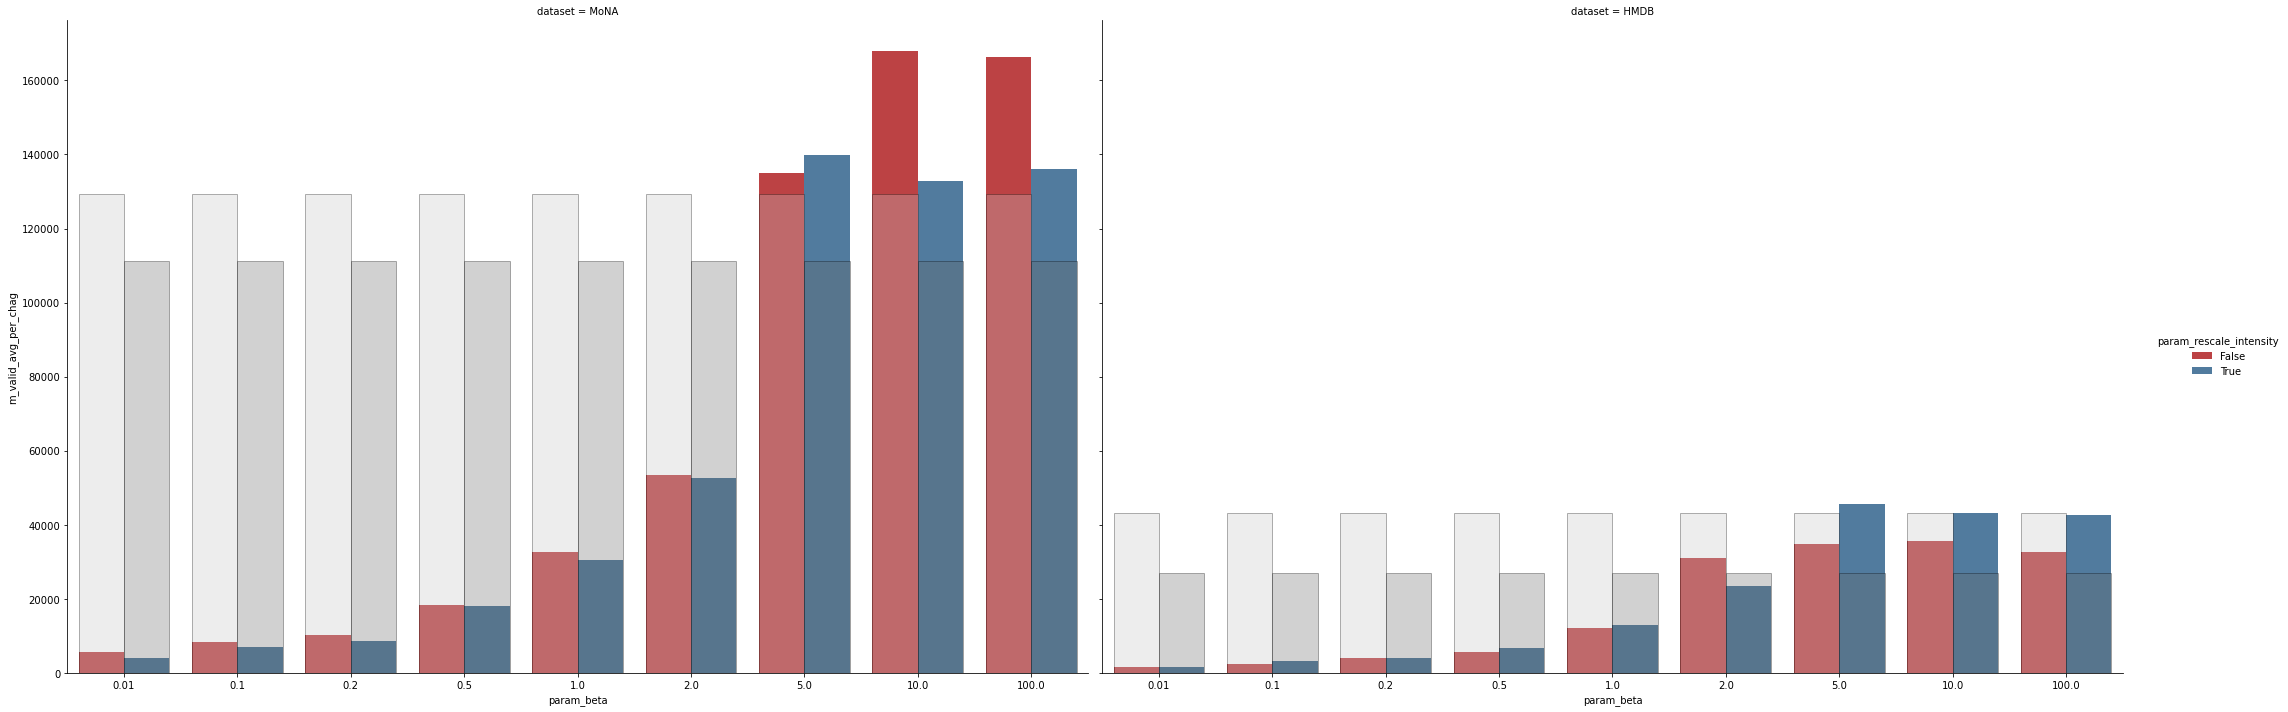

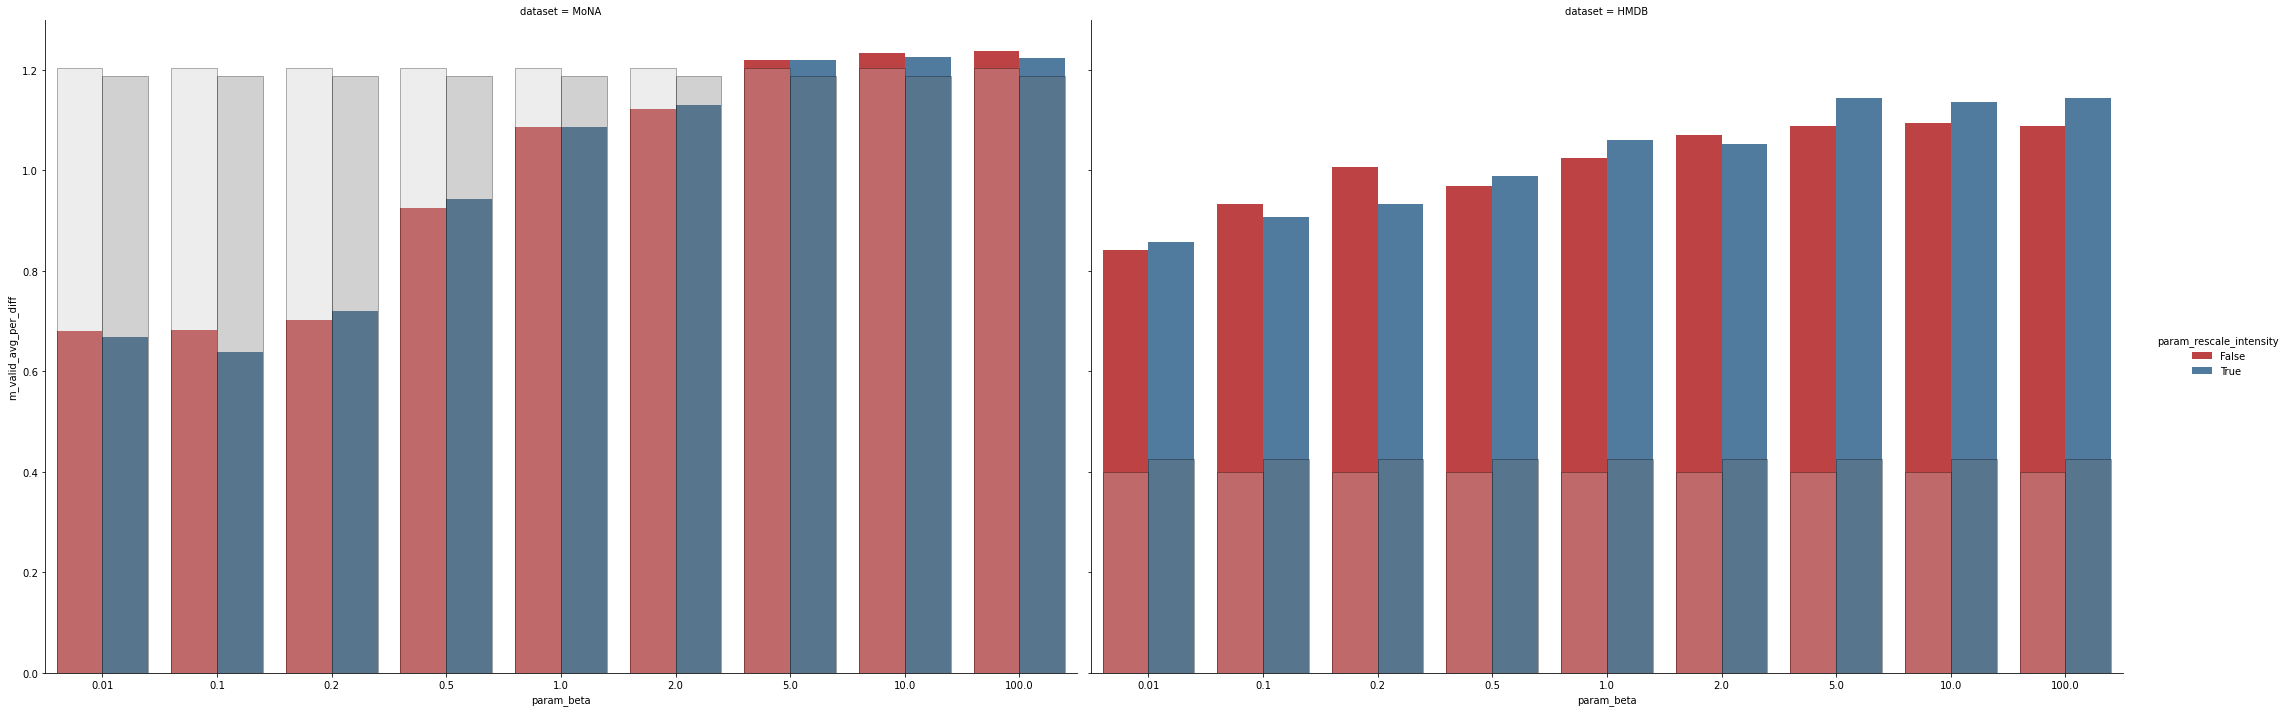

In [40]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    df_ = df[
        (df['param_latent_dim'] == 10) & 
        (df['param_max_num_peaks'] == 50) & 
        (df['param_min_intensity'] == 0.001) & 
        (df['depth'] == 1) & 
        (df['is_symmetric'] == True)
    ]
    ax = sns.catplot(data=df_, x="param_beta", y=column, col='dataset',
        hue='param_rescale_intensity', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'param_beta', avg_column, data=df_, hue='param_rescale_intensity', ci="sd", order=sorted(df['param_beta'].unique().tolist()),
        capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")
    plt.savefig(f'../.img/betavae/betavae-rescale-intensity-{column}.svg')
    